In [1]:
import pandas as pd
import numpy as np

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Dataset/cost-of-living.csv',encoding='utf-8',sep=',',low_memory=False)
df.head()

Unnamed: 0      city      country    x1     x2    x3    x4    x5    x6  \
0           0     Delhi        India  4.90  22.04  4.28  1.84  3.67  1.78   
1           1  Shanghai        China  5.59  40.51  5.59  1.12  4.19  3.96   
2           2   Jakarta    Indonesia  2.54  22.25  3.50  2.02  3.18  2.19   
3           3    Manila  Philippines  3.54  27.40  3.54  1.24  1.90  2.91   
4           4     Seoul  South Korea  7.16  52.77  6.03  3.02  4.52  3.86   

     x7  ...     x47      x48     x49      x50      x51       x52       x53  \
0  0.48  ...   36.26   223.87  133.38   596.16   325.82   2619.46   1068.90   
1  0.52  ...  121.19  1080.07  564.30  2972.57  1532.23  17333.09   9174.88   
2  0.59  ...   80.32   482.85  270.15  1117.69   584.37   2694.05   1269.44   
3  0.93  ...   61.82   559.52  281.78  1754.40   684.81   3536.04   2596.44   
4  1.46  ...  108.30   809.83  583.60  2621.05  1683.74  21847.94  10832.90   

       x54   x55  data_quality  
0   586.35  7.96             1  
1  1382.83  5.01             1  
2   483.19  9.15             1  
3   419.02  7.80             1  
4  2672.23  3.47             1  

[5 rows x 59 columns]

In [3]:
to_drop = ['Unnamed: 0','x28','x29','x30','x31','x32','x34','x35','x37','x39','x40',
           'x42','x43','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','data_quality']
df.drop(to_drop, axis=1, inplace=True)
df.head()

city      country    x1     x2    x3    x4    x5    x6    x7    x8  \
0     Delhi        India  4.90  22.04  4.28  1.84  3.67  1.78  0.48  0.19   
1  Shanghai        China  5.59  40.51  5.59  1.12  4.19  3.96  0.52  0.32   
2   Jakarta    Indonesia  2.54  22.25  3.50  2.02  3.18  2.19  0.59  0.27   
3    Manila  Philippines  3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51   
4     Seoul  South Korea  7.16  52.77  6.03  3.02  4.52  3.86  1.46  0.78   

   ...   x23    x24   x25   x26   x27   x33     x36    x38   x41    x44  
0  ...  0.36   9.79  1.53  2.51  4.28  1.25   57.37   7.96  4.90  32.05  
1  ...  0.62  13.97  0.91  1.93  3.49  1.17   64.76  16.74  8.38  69.17  
2  ...  0.42  20.66  2.06  3.18  2.22  0.79   80.12  30.45  3.18  38.87  
3  ...  0.65   8.84  1.15  1.55  2.65  1.38   97.45  38.02  5.48  38.45  
4  ...  1.06  15.08  2.10  2.49  3.39  1.41  176.24  22.06  9.42  56.99  

[5 rows x 34 columns]

In [4]:
df.drop_duplicates(subset=['city'],inplace=True)

In [5]:
df['city'].duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
4867    False
4868    False
4871    False
4872    False
4873    False
Name: city, Length: 4816, dtype: bool

In [6]:
df = df.set_index('city')
df.head()

country    x1     x2    x3    x4    x5    x6    x7    x8    x9  \
city                                                                           
Delhi           India  4.90  22.04  4.28  1.84  3.67  1.78  0.48  0.19  0.73   
Shanghai        China  5.59  40.51  5.59  1.12  4.19  3.96  0.52  0.32  2.68   
Jakarta     Indonesia  2.54  22.25  3.50  2.02  3.18  2.19  0.59  0.27  1.28   
Manila    Philippines  3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51  1.63   
Seoul     South Korea  7.16  52.77  6.03  3.02  4.52  3.86  1.46  0.78  2.13   

          ...   x23    x24   x25   x26   x27   x33     x36    x38   x41    x44  
city      ...                                                                   
Delhi     ...  0.36   9.79  1.53  2.51  4.28  1.25   57.37   7.96  4.90  32.05  
Shanghai  ...  0.62  13.97  0.91  1.93  3.49  1.17   64.76  16.74  8.38  69.17  
Jakarta   ...  0.42  20.66  2.06  3.18  2.22  0.79   80.12  30.45  3.18  38.87  
Manila    ...  0.65   8.84  1.15  1.55  2.65  1.38   97.45  38.02  5.48  38.45  
Seoul     ...  1.06  15.08  2.10  2.49  3.39  1.41  176.24  22.06  9.42  56.99  

[5 rows x 33 columns]

In [7]:
df = df.dropna(subset=['x1','x2','x9','x23','x33','x19','x4','x5','x12','x22','x36','x25'])

In [8]:
df.rename(columns = {'x1':'Pasto Economico', 'x2':'Pasto per 2','x3':'Pasto McDonald', 'x4':'Birra Locale','x5':'Birra Estera',
                    'x6':'Cappuccino', 'x7':'Cola','x8':'Acqua', 'x9':'Latte','x10':'Pane', 'x11':'Riso',
                    'x12':'Uova', 'x13':'Formaggio Locale','x14':'Pollo', 'x15':'Manzo','x16':'Mele', 'x17':'Banane',
                    'x18':'Arance','x19':'Pomodori','x20':'Patate','x21':'Cipolle','x22':'Lattuga',
                    'x23':'Acqua (1.5 lt)','x24':'Vino','x25':'Birra Locale (Supermarket)','x26':'Birra Estera (Supermarket)',
                    'x27':'Sigarette','x33':'Carburante','x36':'Utenze Domestiche (85 mq)','x38':'Internet','x41':'Cinema',
                    'x44':'Jeans'}, inplace = True)
#x = df[['Pasto Economico','Cappuccino','Cola','Acqua','Riso',"Latte","Formaggio Locale",'Vino',"Birra Locale","Pane","Pollo",'Pomodori','Patate','Arance','Mele',"Manzo"]].values

In [9]:
df['Pasto McDonald'] = df.groupby('country')['Pasto McDonald'].transform(lambda x: x.fillna(x.mean()))
df['Cappuccino'] = df.groupby('country')['Cappuccino'].transform(lambda x: x.fillna(x.mean()))
df['Cola'] = df.groupby('country')['Cola'].transform(lambda x: x.fillna(x.mean()))
df['Acqua'] = df.groupby('country')['Acqua'].transform(lambda x: x.fillna(x.mean()))
df['Pane'] = df.groupby('country')['Pane'].transform(lambda x: x.fillna(x.mean()))
df['Riso'] = df.groupby('country')['Riso'].transform(lambda x: x.fillna(x.mean()))
df['Pollo'] = df.groupby('country')['Pollo'].transform(lambda x: x.fillna(x.mean()))
df['Formaggio Locale'] = df.groupby('country')['Formaggio Locale'].transform(lambda x: x.fillna(x.mean()))
df['Manzo'] = df.groupby('country')['Manzo'].transform(lambda x: x.fillna(x.mean()))
df['Banane'] = df.groupby('country')['Banane'].transform(lambda x: x.fillna(x.mean()))
df['Arance'] = df.groupby('country')['Arance'].transform(lambda x: x.fillna(x.mean()))
df['Pomodori'] = df.groupby('country')['Pomodori'].transform(lambda x: x.fillna(x.mean()))
df['Patate'] = df.groupby('country')['Patate'].transform(lambda x: x.fillna(x.mean()))
df['Cipolle'] = df.groupby('country')['Cipolle'].transform(lambda x: x.fillna(x.mean()))
df['Vino'] = df.groupby('country')['Vino'].transform(lambda x: x.fillna(x.mean()))
df['Birra Estera (Supermarket)'] = df.groupby('country')['Birra Estera (Supermarket)'].transform(lambda x: x.fillna(x.mean()))
df['Sigarette'] = df.groupby('country')['Sigarette'].transform(lambda x: x.fillna(x.mean()))
df['Internet'] = df.groupby('country')['Internet'].transform(lambda x: x.fillna(x.mean()))
df['Cinema'] = df.groupby('country')['Cinema'].transform(lambda x: x.fillna(x.mean()))
df['Jeans'] = df.groupby('country')['Jeans'].transform(lambda x: x.fillna(x.mean()))
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
df = df.round(decimals = 2)

In [10]:
df.describe()

Pasto Economico  Pasto per 2  Pasto McDonald  Birra Locale  \
count      3470.000000  3470.000000     3470.000000   3470.000000   
mean         10.026294    42.854620        6.764337      3.314908   
std           6.523000    24.493238        2.604103      2.051416   
min           0.450000     3.250000        1.060000      0.320000   
25%           4.385000    22.360000        4.890000      1.560000   
50%           9.530000    40.000000        6.750000      2.890000   
75%          15.000000    60.000000        8.310000      4.840000   
max          50.000000   155.800000       18.350000     14.000000   

       Birra Estera   Cappuccino         Cola        Acqua        Latte  \
count   3470.000000  3470.000000  3470.000000  3470.000000  3470.000000   
mean       3.801735     2.648879     1.515478     1.090954     1.139542   
std        1.980745     1.276646     0.882856     0.743408     0.480346   
min        0.310000     0.220000     0.120000     0.080000     0.320000   
25%        2.150000     1.560000     0.780000     0.470000     0.830000   
50%        3.500000     2.510000     1.450000     1.000000     1.040000   
75%        5.027500     3.570000     2.120000     1.560000     1.300000   
max       15.000000     7.670000     5.630000     5.770000     6.810000   

              Pane  ...  Acqua (1.5 lt)         Vino  \
count  3470.000000  ...     3470.000000  3470.000000   
mean      1.572545  ...        0.936977     8.274542   
std       1.007459  ...        0.617380     4.176319   
min       0.080000  ...        0.110000     0.360000   
25%       0.790000  ...        0.490000     5.190000   
50%       1.310000  ...        0.730000     7.350000   
75%       2.160000  ...        1.280000    11.000000   
max       6.850000  ...        4.690000    40.310000   

       Birra Locale (Supermarket)  Birra Estera (Supermarket)    Sigarette  \
count                 3470.000000                 3470.000000  3470.000000   
mean                     1.643971                    2.237778     6.086925   
std                      0.874502                    1.073221     4.303722   
min                      0.250000                    0.350000     0.450000   
25%                      1.000000                    1.490000     2.950000   
50%                      1.445000                    2.080000     5.065000   
75%                      2.140000                    2.810000     8.120000   
max                      7.670000                   15.670000    45.580000   

        Carburante  Utenze Domestiche (85 mq)       Internet       Cinema  \
count  3470.000000                3470.000000    3470.000000  3470.000000   
mean      1.370559                 129.328046     177.694040     8.130354   
std       0.489300                  78.207768    8256.394256     4.042030   
min       0.030000                   6.080000       1.350000     0.680000   
25%       1.092500                  66.727500      17.950000     4.720000   
50%       1.270000                 123.700000      32.330000     7.940000   
75%       1.730000                 176.152500      54.700000    11.430000   
max       3.700000                1063.630000  486391.790000    39.920000   

             Jeans  
count  3470.000000  
mean     53.303133  
std      24.803305  
min       4.070000  
25%      36.105000  
50%      49.130000  
75%      70.300000  
max     178.060000  

[8 rows x 32 columns]

In [11]:
df.isnull().sum()

country                       0
Pasto Economico               0
Pasto per 2                   0
Pasto McDonald                0
Birra Locale                  0
Birra Estera                  0
Cappuccino                    0
Cola                          0
Acqua                         0
Latte                         0
Pane                          0
Riso                          0
Uova                          0
Formaggio Locale              0
Pollo                         0
Manzo                         0
Mele                          0
Banane                        0
Arance                        0
Pomodori                      0
Patate                        0
Cipolle                       0
Lattuga                       0
Acqua (1.5 lt)                0
Vino                          0
Birra Locale (Supermarket)    0
Birra Estera (Supermarket)    0
Sigarette                     0
Carburante                    0
Utenze Domestiche (85 mq)     0
Internet                      0
Cinema  

In [159]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [160]:
dfnations = df.groupby('country').mean().reset_index()

In [161]:
dfnations['Sigla'] = dfnations.apply(lambda x: get_continent(x['country'])[0], axis=1)
dfnations['Continent'] = dfnations.apply(lambda x: get_continent(x['country'])[1], axis=1)

In [162]:
dfnations = dfnations[dfnations.Continent != 'Unknown']

In [163]:
dfnations.reset_index()

index    country  Pasto Economico  Pasto per 2  Pasto McDonald  \
0        0    Albania         4.386429    25.482857        4.062857   
1        1    Algeria         1.840000    14.090000        2.795714   
2        2    Andorra        14.020000    51.930000        8.310000   
3        3     Angola         7.840000    64.250000       10.510000   
4        5  Argentina         6.212222    26.649444        5.239444   
..     ...        ...              ...          ...             ...   
170    180  Venezuela         9.183636    33.768182        8.069091   
171    181    Vietnam         2.221429    19.988571        4.443571   
172    182      Yemen         5.990000    19.980000        9.990000   
173    183     Zambia         3.000000    18.370000        3.170000   
174    184   Zimbabwe         6.125000    37.500000        6.187500   

     Birra Locale  Birra Estera  Cappuccino      Cola     Acqua  ...  \
0        1.354286      1.837143    1.147857  1.123571  0.579286  ...   
1        1.420476      1.670476    0.528571  0.443333  0.188095  ...   
2        2.080000      3.120000    1.740000  1.900000  1.400000  ...   
3        2.200000      1.500000    3.930000  1.950000  1.420000  ...   
4        1.528889      2.161667    1.532778  1.101111  0.861667  ...   
..            ...           ...         ...       ...       ...  ...   
170      1.617273      2.250000    1.762727  1.145455  0.783636  ...   
171      0.848571      1.581429    1.634286  0.530000  0.275000  ...   
172      3.060000      3.730000    2.000000  1.310000  0.500000  ...   
173      1.220000      1.500000    1.810000  0.880000  0.470000  ...   
174      1.287500      1.950000    2.357500  0.665000  0.470000  ...   

     Birra Locale (Supermarket)  Birra Estera (Supermarket)  Sigarette  \
0                      0.805714                    1.259286   2.777857   
1                      1.364762                    1.527619   2.055238   
2                      1.040000                    1.450000   4.930000   
3                      0.780000                    0.790000   2.000000   
4                      1.118333                    1.796111   2.091667   
..                          ...                         ...        ...   
170                    1.254545                    2.175455   3.840909   
171                    0.782857                    1.426429   1.177857   
172                    0.700000                    2.240000   4.800000   
173                    0.990000                    1.260000   2.660000   
174                    1.230000                    2.467500   2.000000   

     Carburante  Utenze Domestiche (85 mq)    Internet    Cinema      Jeans  \
0      1.692857                  72.535000   15.953571  4.847143  34.147143   
1      0.288571                  39.393810   37.220952  4.816190  26.653333   
2      1.180000                  71.910000   40.250000  6.230000  67.520000   
3      0.330000                  30.780000  192.230000  4.840000  95.950000   
4      0.892778                  49.327778   21.010556  4.276667  50.778889   
..          ...                        ...         ...       ...        ...   
170    0.501818                  18.060909   42.674545  5.454545  44.936364   
171    1.004286                  61.737857    9.700000  3.885714  35.655000   
172    2.710000                  91.420000   73.260000  8.130000  59.940000   
173    1.360000                 140.690000  103.740000  2.000000  12.660000   
174    1.423750                  65.502500   92.687500  6.875000  20.835000   

     Sigla  Continent  
0       AL         EU  
1       DZ         AF  
2       AD         EU  
3       AO         AF  
4       AR         SA  
..     ...        ...  
170     VE         SA  
171     VN         AS  
172     YE         AS  
173     ZM         AF  
174     ZW         AF  

[175 rows x 36 columns]

[Text(0.5, 0, 'Continente'),
 Text(0, 0.5, 'Prezzo di un pasto per due persone ($)')]

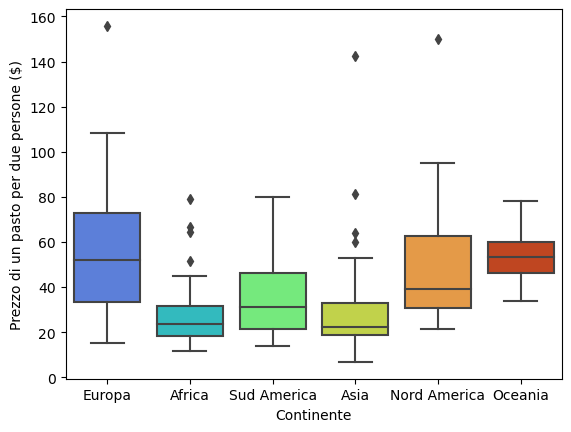

In [212]:
import matplotlib as plt
import seaborn as sns

sns.boxplot(x='Continent', y='Pasto per 2', data=dfnations,palette="turbo").set(
    xlabel='Continente', 
    ylabel='Prezzo di un pasto per due persone ($)'
)

[Text(0.5, 0, 'Continente'), Text(0, 0.5, 'Prezzo di un paio di Jeans ($)')]

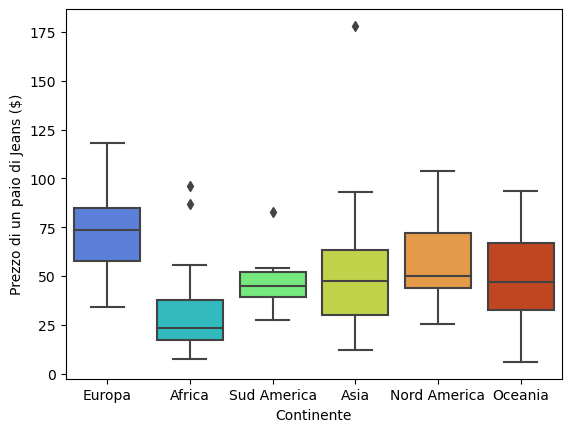

In [227]:
import matplotlib as plt
import seaborn as sns

sns.boxplot(x='Continent', y='Jeans', data=dfnations,palette="turbo").set(
    xlabel='Continente', 
    ylabel='Prezzo di un paio di Jeans ($)'
)

In [201]:
dfnations['Continent'] = dfnations['Continent'].replace(['Euroape'], 'Europa')
dfnations['Continent'] = dfnations['Continent'].replace(['AF'], 'Africa')
dfnations['Continent'] = dfnations['Continent'].replace(['SA'], 'Sud America')
dfnations['Continent'] = dfnations['Continent'].replace(['NA'], 'Nord America')
dfnations['Continent'] = dfnations['Continent'].replace(['OC'], 'Oceania')
dfnations['Continent'] = dfnations['Continent'].replace(['AS'], 'Asia')


[Text(0, 0.5, 'Prezzo di 1 kg di pollo (in $)'),
 Text(0.5, 1.0, 'Top 10 città per prezzo del pollo')]

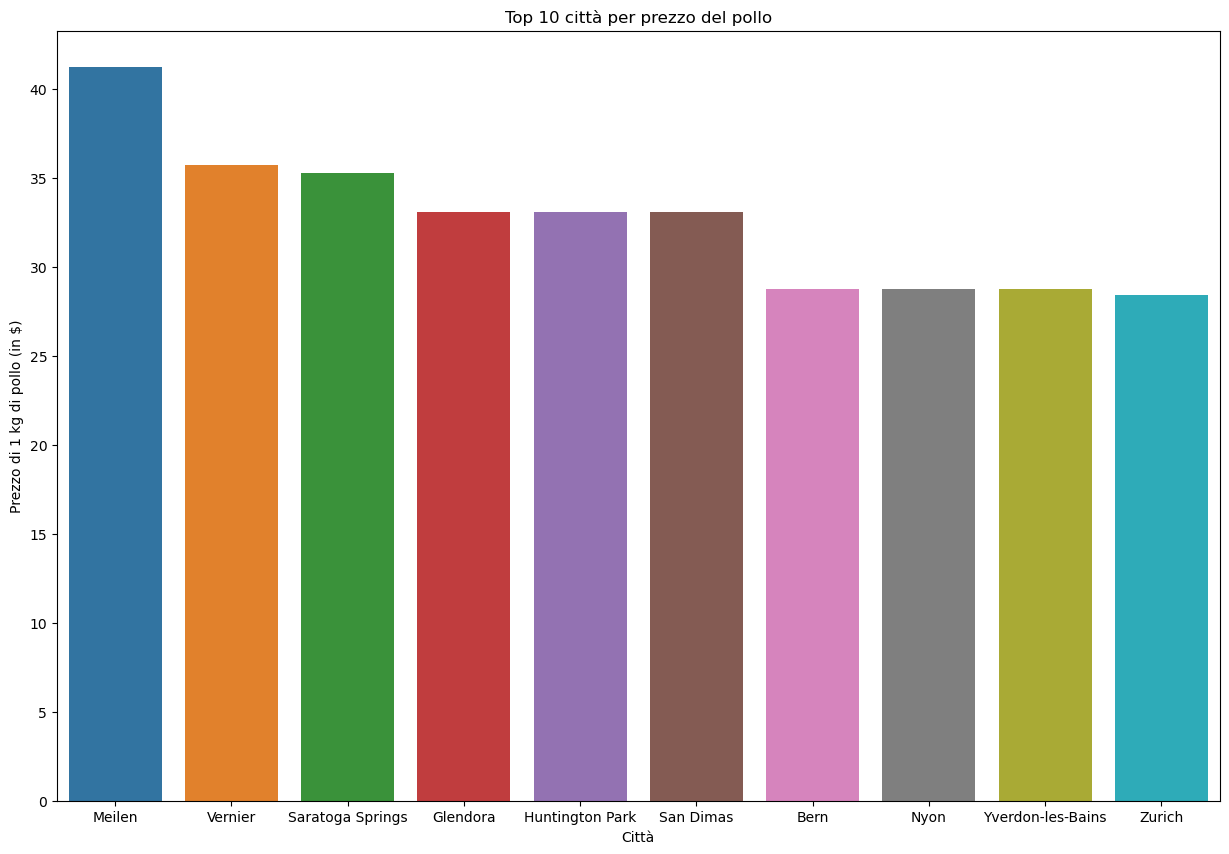

In [248]:
d = {'Città':list(df.index),'Pollo':list(df['Pollo'])}
df2 = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df2.nlargest(10, 'Pollo')
plot_order = d.groupby('Città')['Pollo'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Città',
    y='Pollo',
    data=d,
    order=plot_order
).set(
    ylabel='Prezzo di 1 kg di pollo (in $)',
    title ='Top 10 città per prezzo del pollo'
)

[Text(0, 0.5, 'Prezzo di 1 kg di pollo (in $)'),
 Text(0.5, 1.0, 'Top 10 città per prezzo del pane')]

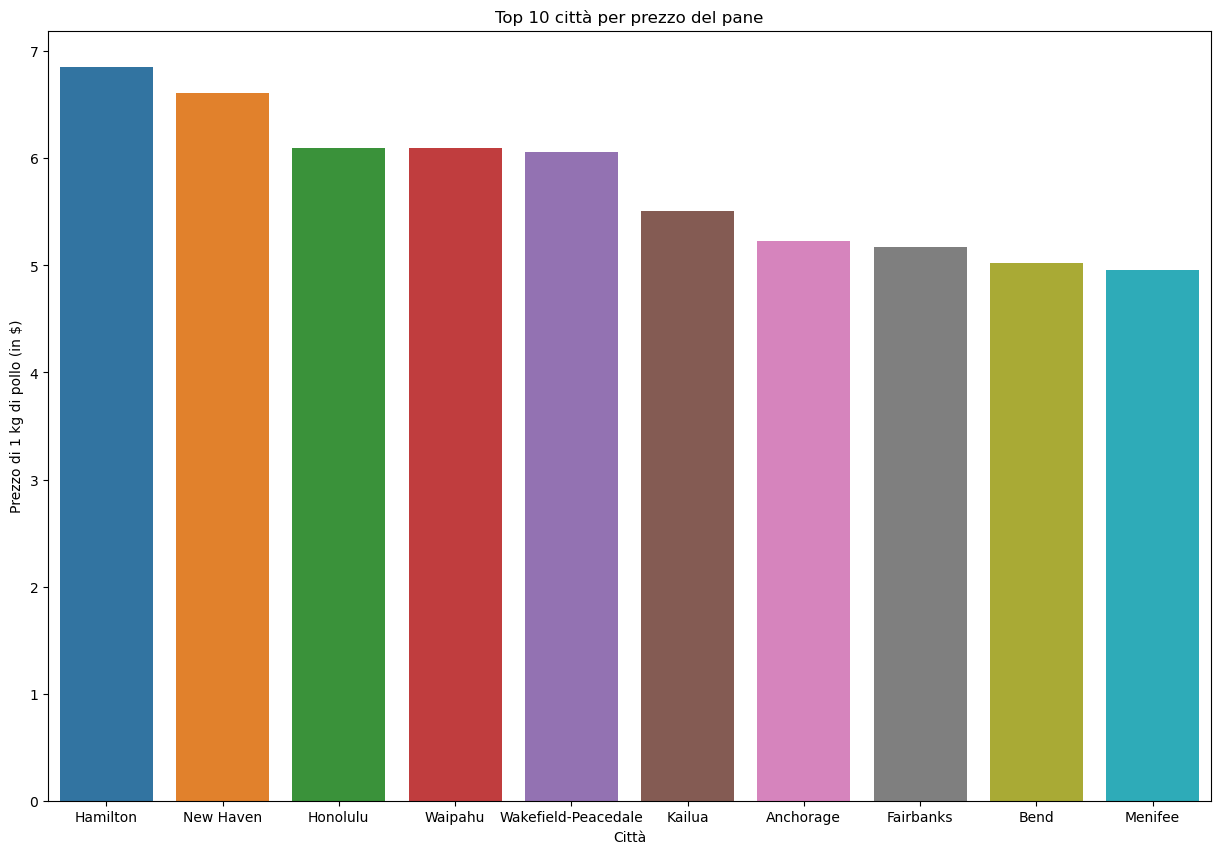

In [249]:
d = {'Città':list(df.index),'Pane':list(df['Pane'])}
df2 = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df2.nlargest(10, 'Pane')
plot_order = d.groupby('Città')['Pane'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Città',
    y='Pane',
    data=d,
    order=plot_order
).set(
    ylabel='Prezzo di 1 kg di pollo (in $)',
    title ='Top 10 città per prezzo del pane'
)

In [ ]:
d = {'Città':list(df.index),'Pane':list(df['Pane'])}
df2 = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df2.nlargest(10, 'Pane')
plot_order = d.groupby('Città')['Pane'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Città',
    y='Pane',
    data=d,
    order=plot_order
)

In [ ]:
d = {'Città':list(df.index),'Pane':list(df['Pane'])}
df2 = pd.DataFrame(data = d)
plt.figure(figsize=(15,10))
d= df2.nlargest(10, 'Pane')
plot_order = d.groupby('Città')['Pane'].sum().sort_values(ascending=False).index.values
sns.barplot(
    x='Città',
    y='Pane',
    data=d,
    order=plot_order
)

# Senza Normalizzazione Pollo e Pane

In [137]:
dataG = df[["Pollo","Pane"]]

x = dataG.iloc[:, [0, 1]].values
x

array([[ 3.79,  0.51],
       [ 4.67,  2.57],
       [ 3.46,  1.21],
       ...,
       [ 7.54,  1.92],
       [ 7.15,  1.24],
       [13.42,  2.85]])

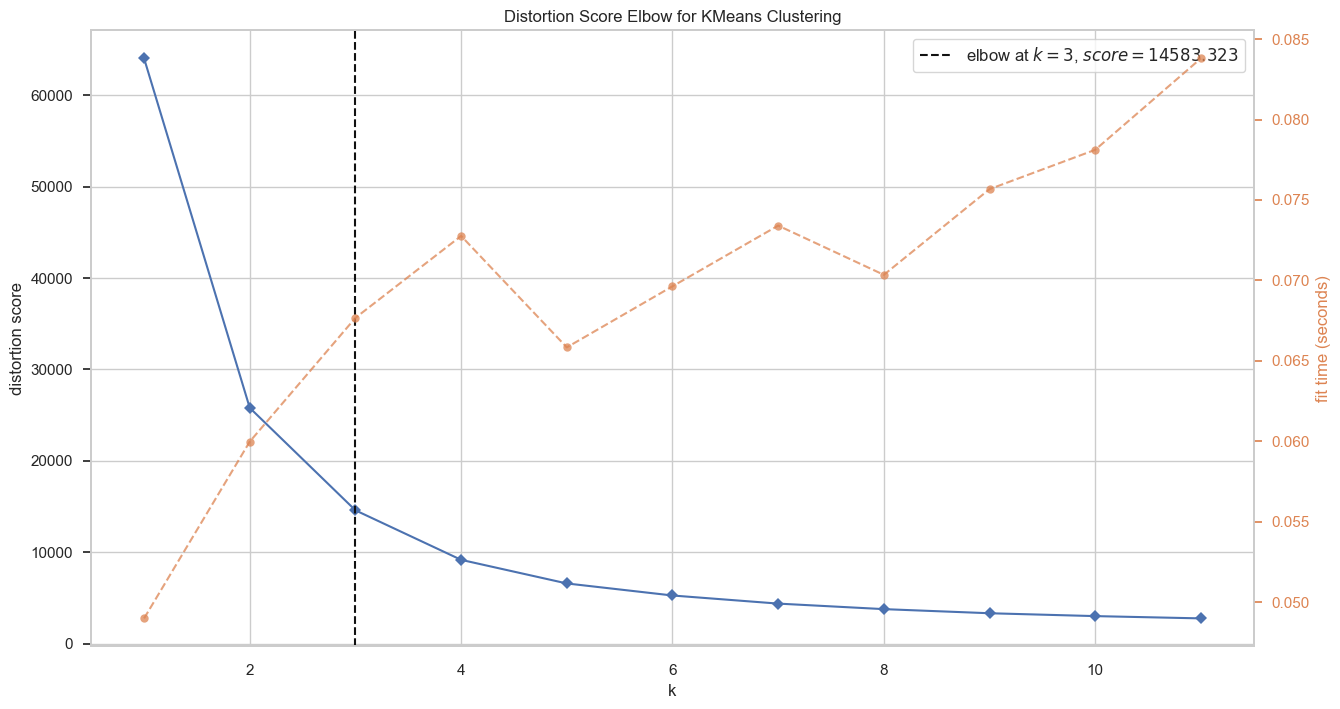

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [138]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(dataG)        # Fit the data to the visualizer
visualizer.show()        # Final

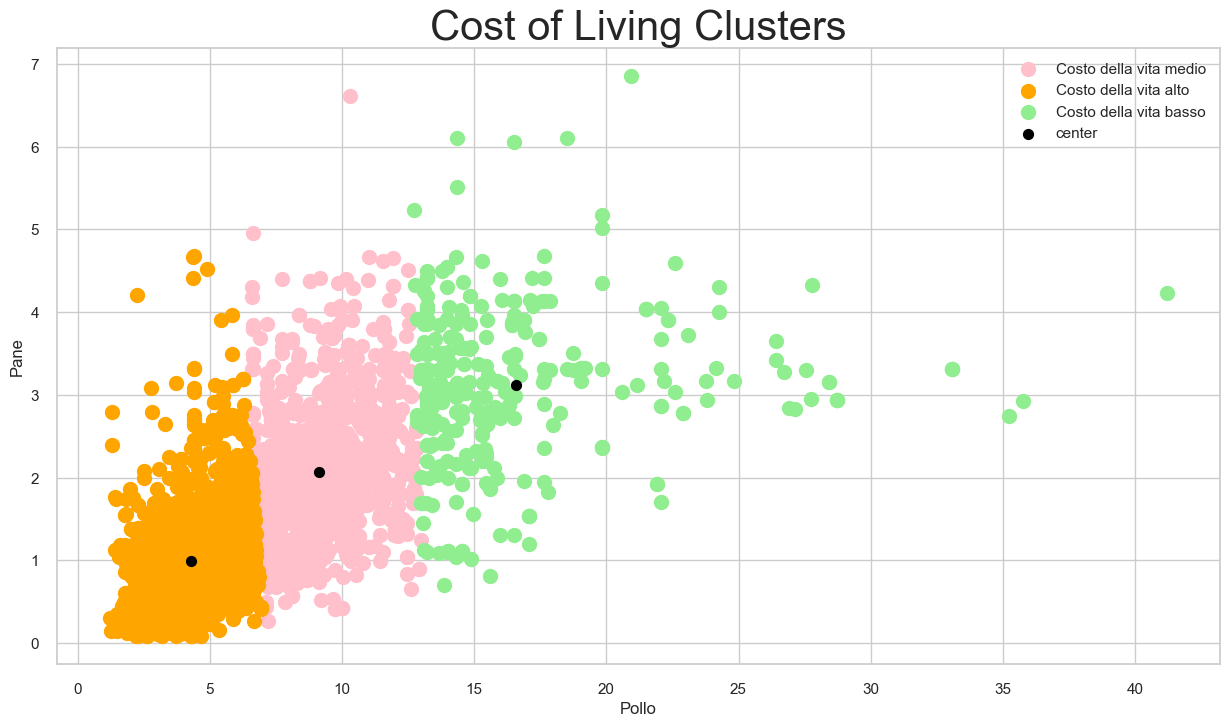

In [112]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cost of Living Clusters', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Costo della vita medio' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Costo della vita alto')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Costo della vita basso')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('Pollo')
plt.ylabel('Pane')
plt.legend()
plt.show()

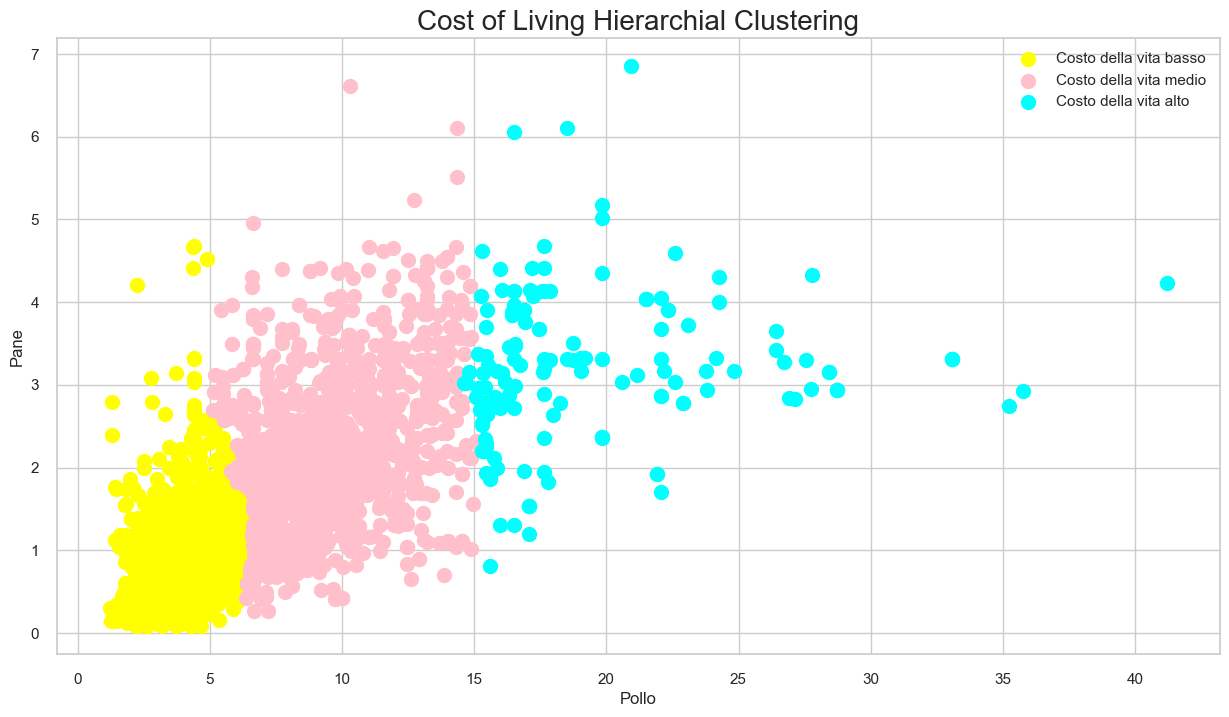

In [141]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Costo della vita basso')
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Costo della vita medio')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Costo della vita alto')


plt.title('Cost of Living Hierarchial Clustering', fontsize = 20)
plt.xlabel('Pollo')
plt.ylabel('Pane')
plt.legend()
plt.show()

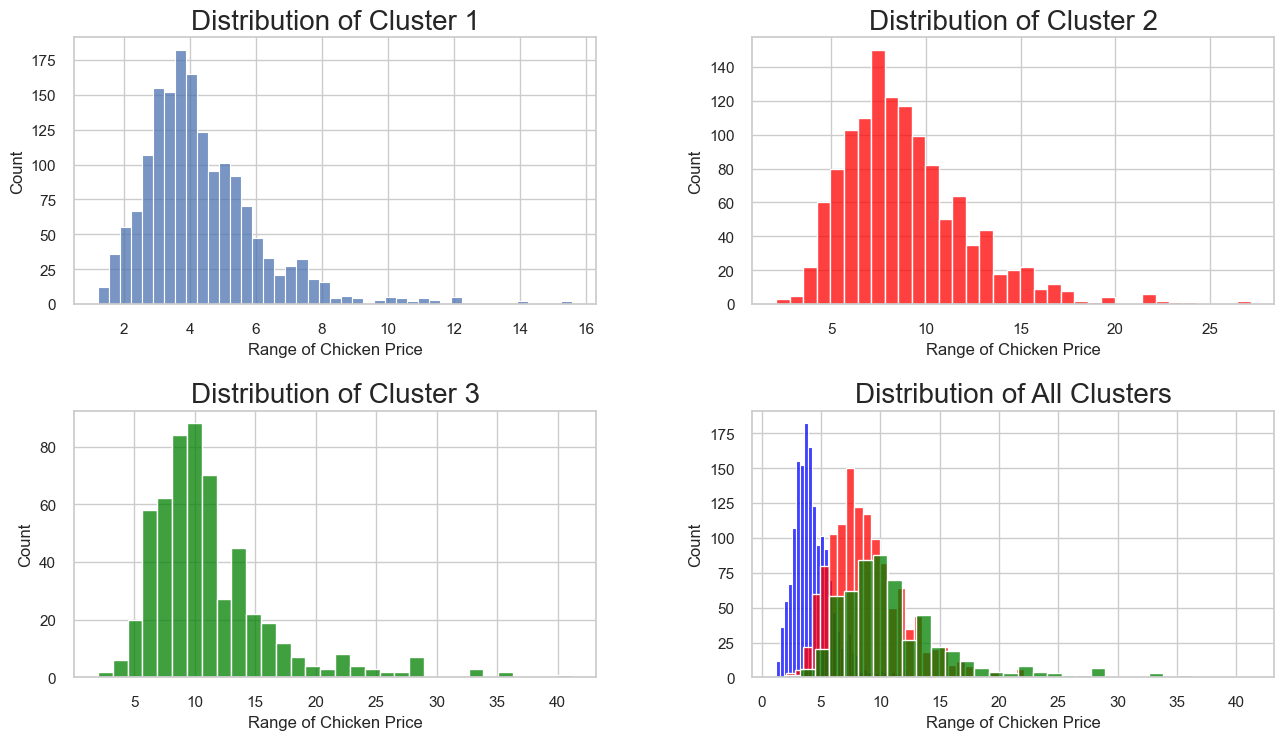

In [142]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pollo'], kde=False)
plt.title('Distribution of Cluster 1', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(cluster2['Pollo'], color = 'red', kde=False)
plt.title('Distribution of Cluster 2', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(cluster3['Pollo'], color = 'green', kde=False)
plt.title('Distribution of Cluster 3', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pollo'],color='blue',kde=False)
sns.histplot(cluster2['Pollo'],color='red',kde=False)
sns.histplot(cluster3['Pollo'],color='green',kde=False)
plt.title('Distribution of All Clusters', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.4)
plt.show()


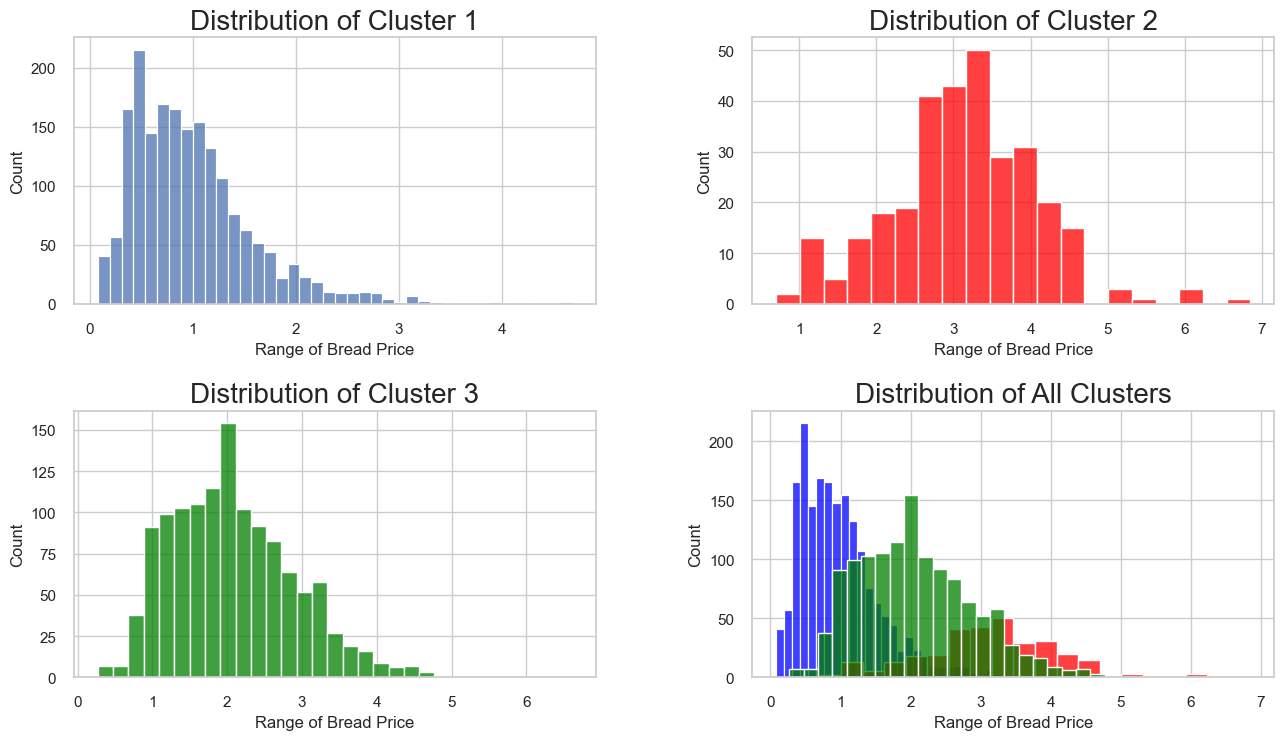

In [116]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pane'], kde=False)
plt.title('Distribution of Cluster 1', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(cluster2['Pane'], color = 'red', kde=False)
plt.title('Distribution of Cluster 2', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(cluster3['Pane'], color = 'green', kde=False)
plt.title('Distribution of Cluster 3', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pane'],color='blue',kde=False)
sns.histplot(cluster2['Pane'],color='red',kde=False)
sns.histplot(cluster3['Pane'],color='green',kde=False)
plt.title('Distribution of All Clusters', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.4)
plt.show()


## Clustering con 4 Cluster, risultati leggermente peggiori 

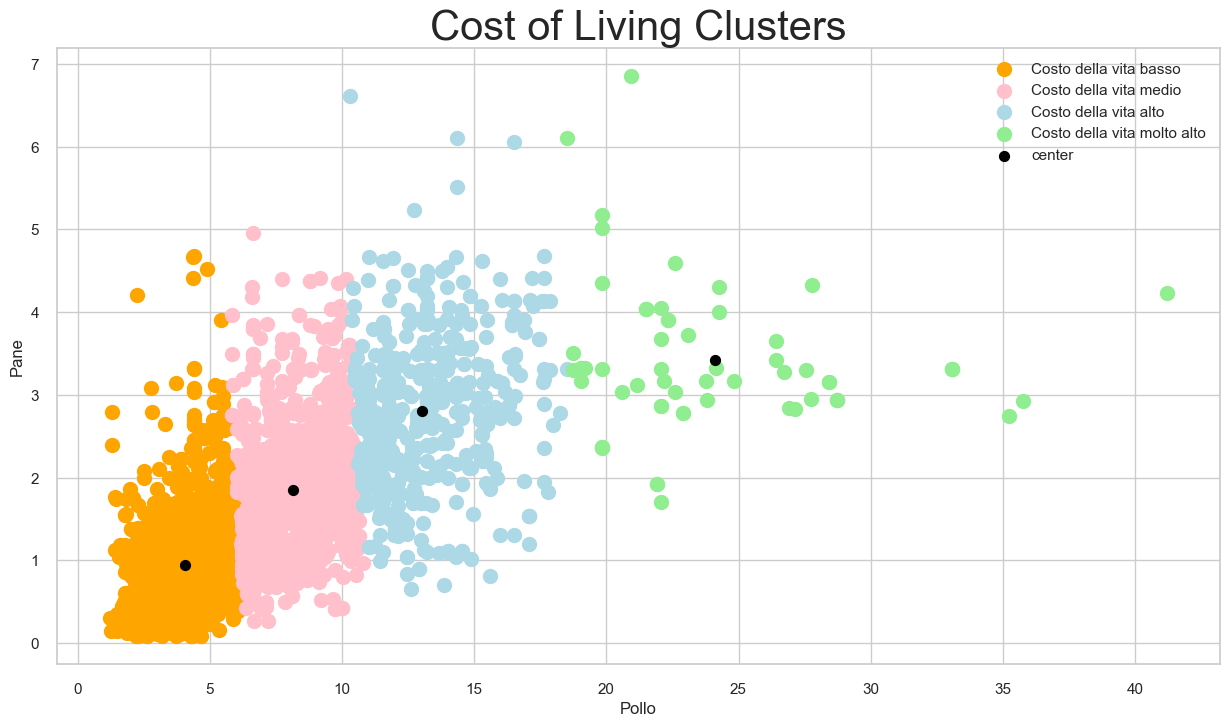

In [121]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cost of Living Clusters', fontsize = 30)

plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Costo della vita basso')
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Costo della vita medio' )
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'lightblue', label = 'Costo della vita alto')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Costo della vita molto alto')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('Pollo')
plt.ylabel('Pane')
plt.legend()
plt.show()

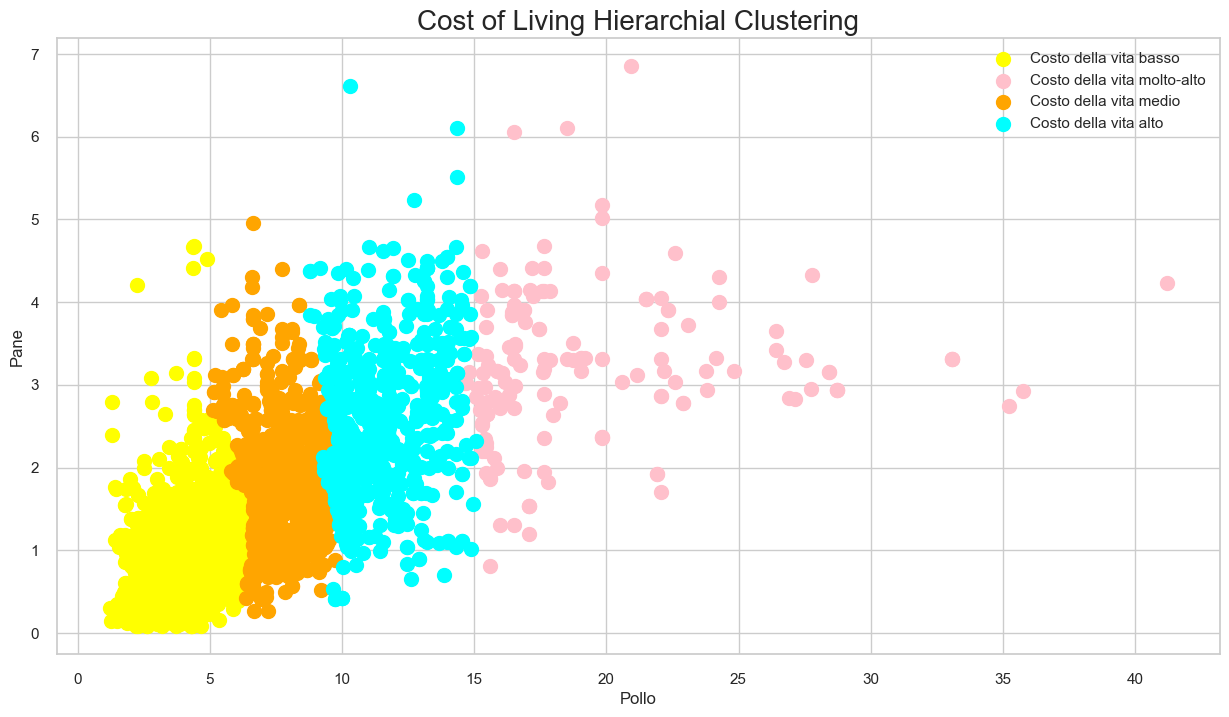

In [125]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Costo della vita basso')
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Costo della vita molto-alto')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'orange', label = 'Costo della vita medio')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Costo della vita alto')


plt.title('Cost of Living Hierarchial Clustering', fontsize = 20)
plt.xlabel('Pollo')
plt.ylabel('Pane')
plt.legend()
plt.show()

# Silhouette con 3 cluster

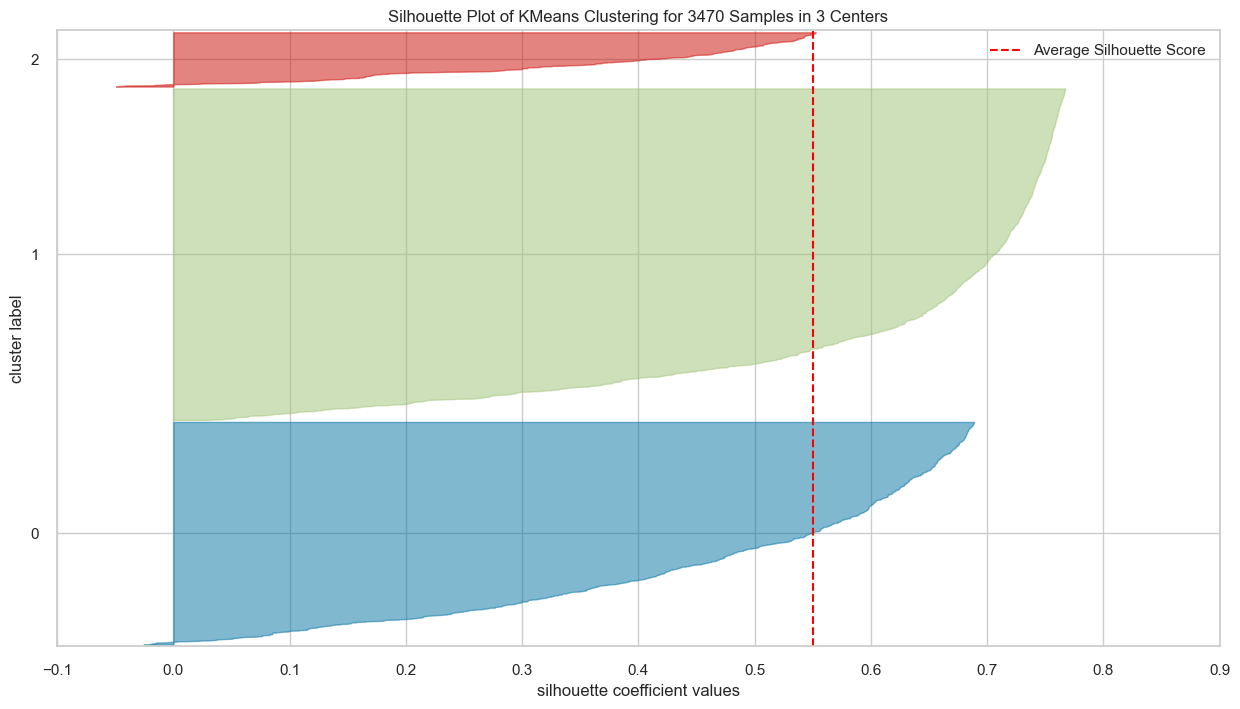

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3470 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [113]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        #

## Silhouette con 4 cluster

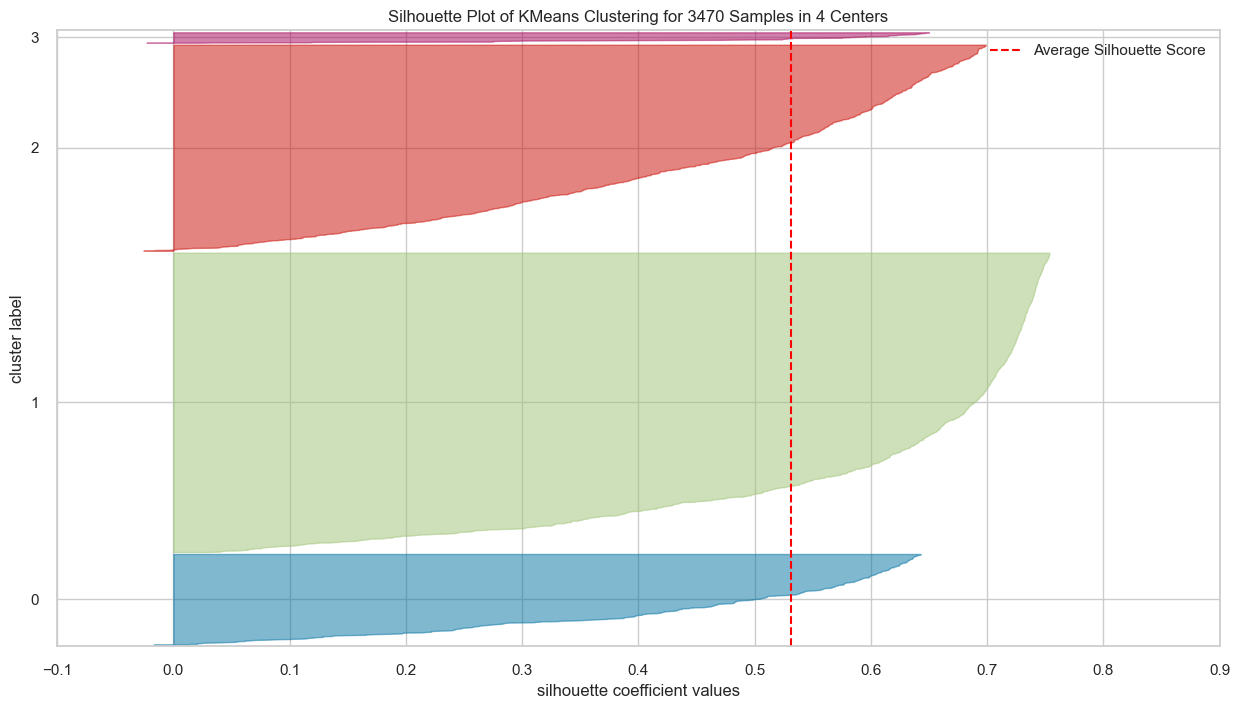

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3470 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [118]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        #

# Con Normalizzazione Pollo e Pane

In [143]:
dataG = df[["Pollo","Pane"]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(dataG)
#x = dataG.iloc[:, [0, 1]].values
x

array([[-0.79930657, -1.05482967],
       [-0.58859338,  0.99021294],
       [-0.87832401, -0.35991228],
       ...,
       [ 0.09861896,  0.3449325 ],
       [ 0.00523471, -0.3301301 ],
       [ 1.50656619,  1.26817989]])

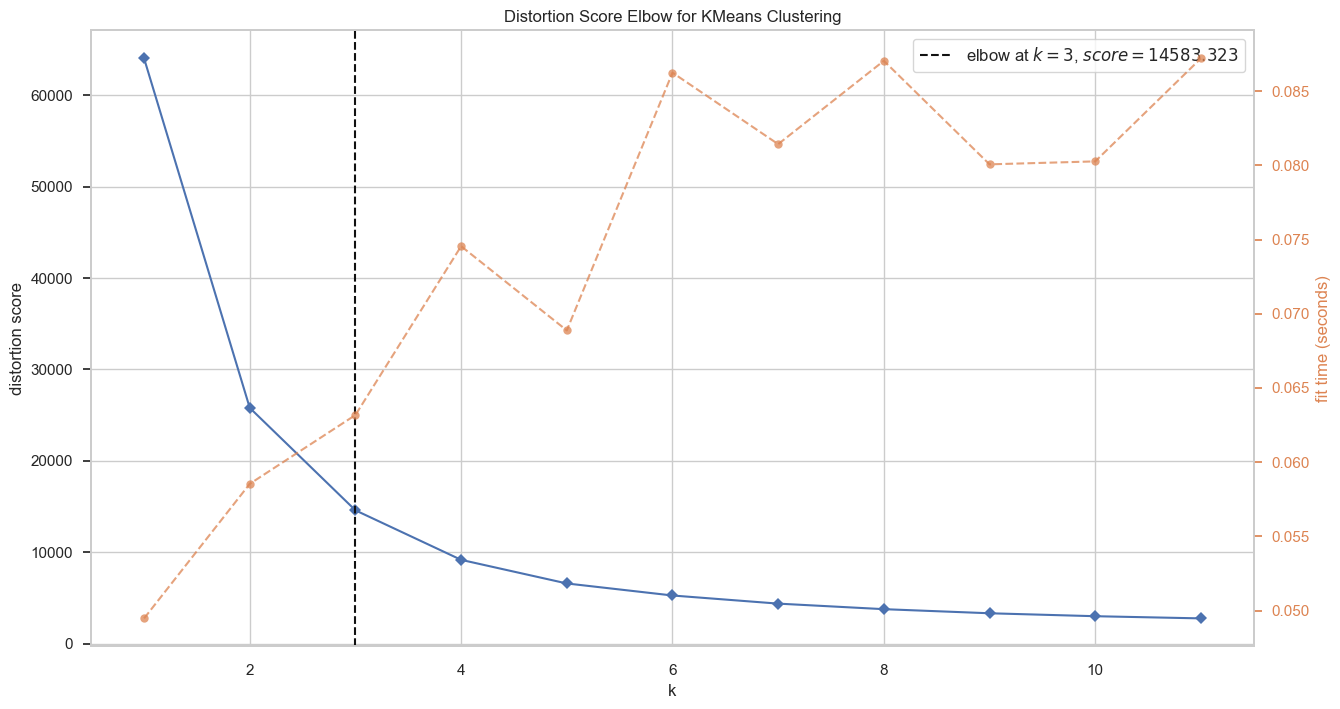

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(dataG)        # Fit the data to the visualizer
visualizer.show()        # Final

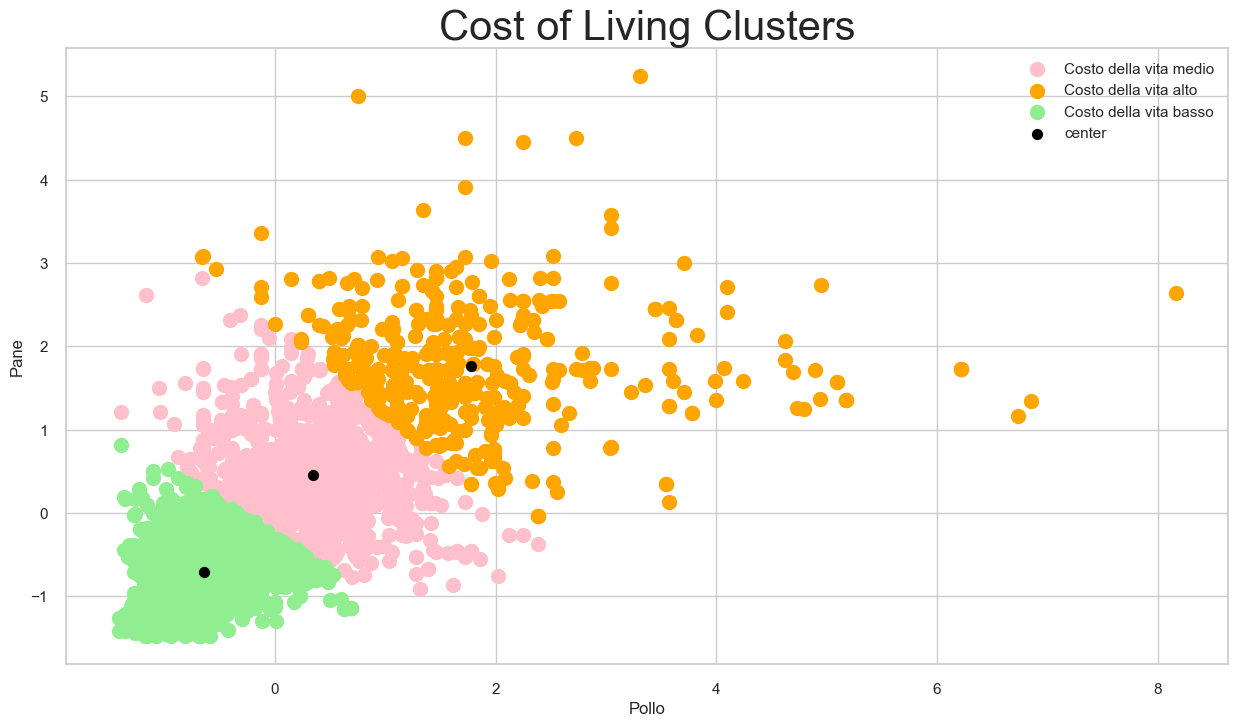

In [145]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cost of Living Clusters', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Costo della vita medio' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Costo della vita alto')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Costo della vita basso')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('Pollo')
plt.ylabel('Pane')
plt.legend()
plt.show()

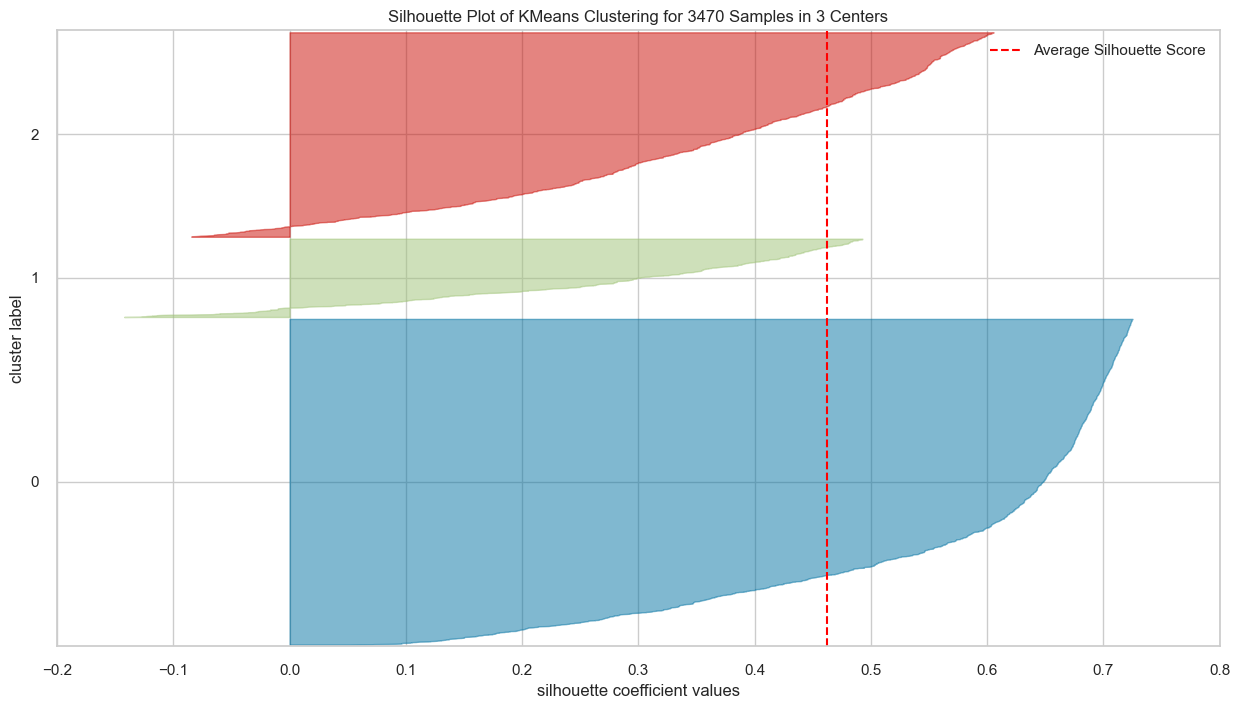

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3470 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [107]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        #

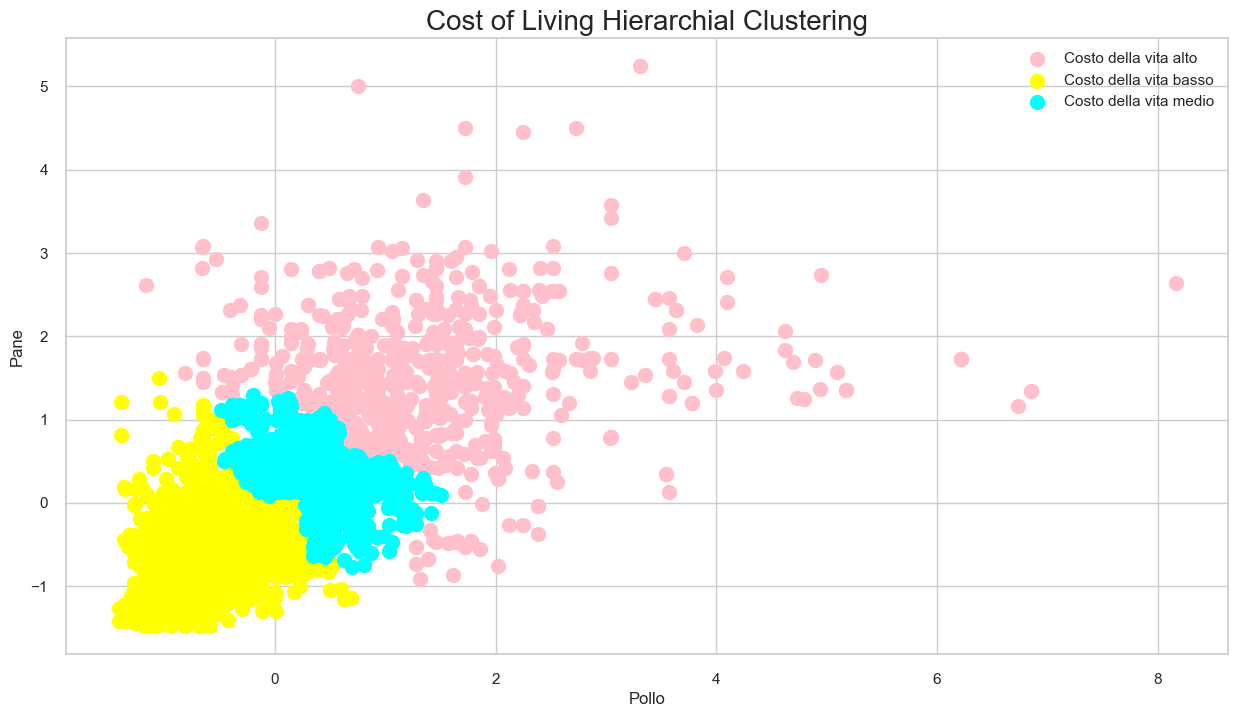

In [146]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Costo della vita alto')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Costo della vita basso')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Costo della vita medio')


plt.title('Cost of Living Hierarchial Clustering', fontsize = 20)
plt.xlabel('Pollo')
plt.ylabel('Pane')
plt.legend()
plt.show()

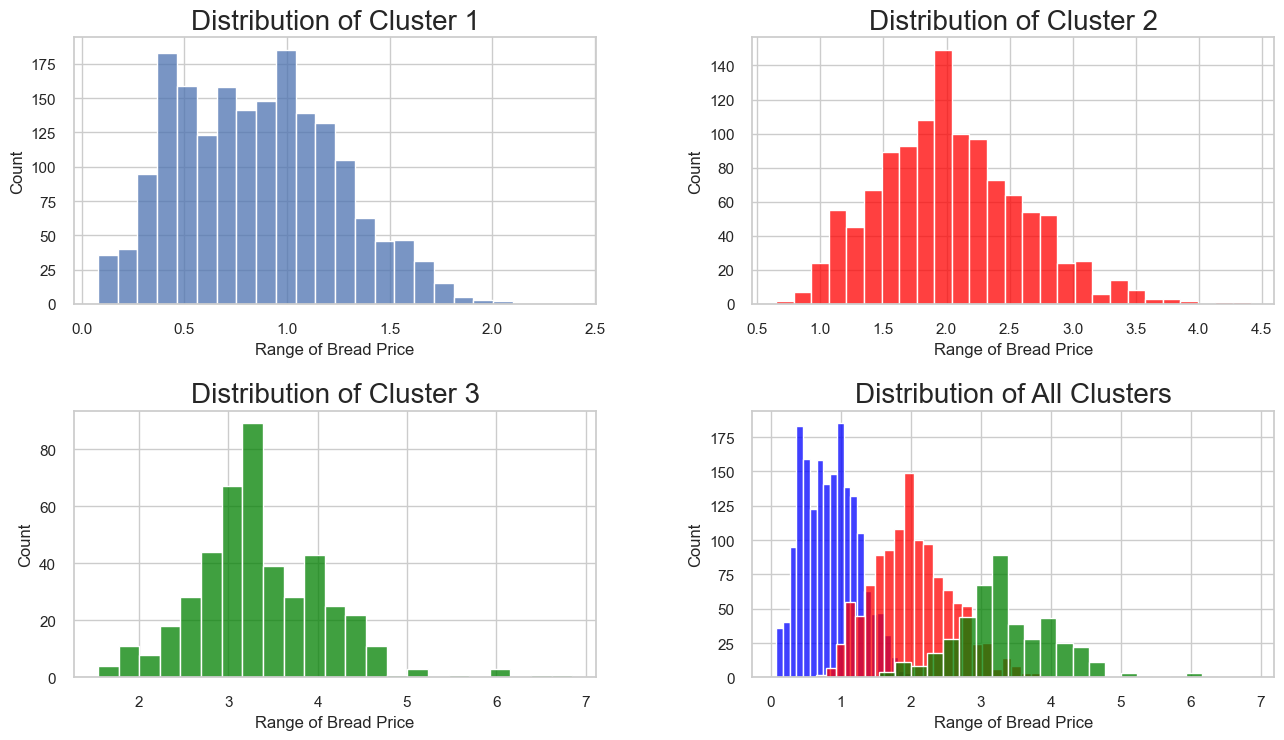

In [154]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pane'], kde=False)
plt.title('Distribution of Cluster 1', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(cluster2['Pane'], color = 'red', kde=False)
plt.title('Distribution of Cluster 2', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(cluster3['Pane'], color = 'green', kde=False)
plt.title('Distribution of Cluster 3', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pane'],color='blue',kde=False)
sns.histplot(cluster2['Pane'],color='red',kde=False)
sns.histplot(cluster3['Pane'],color='green',kde=False)
plt.title('Distribution of All Clusters', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.4)
plt.show()


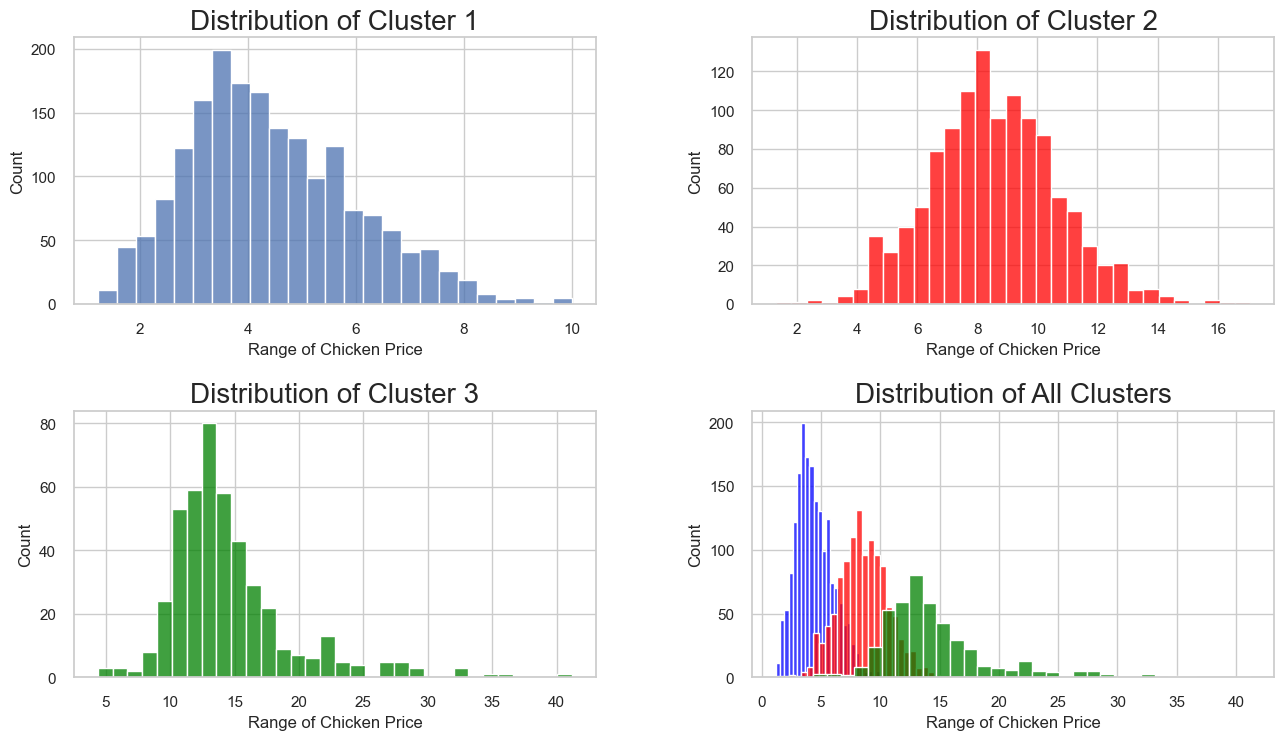

In [159]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pollo'], kde=False)
plt.title('Distribution of Cluster 1', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(cluster2['Pollo'], color = 'red', kde=False)
plt.title('Distribution of Cluster 2', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(cluster3['Pollo'], color = 'green', kde=False)
plt.title('Distribution of Cluster 3', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pollo'],color='blue',kde=False)
sns.histplot(cluster2['Pollo'],color='red',kde=False)
sns.histplot(cluster3['Pollo'],color='green',kde=False)
plt.title('Distribution of All Clusters', fontsize = 20)
plt.xlabel('Range of Chicken Price')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.4)
plt.show()


# Fine Normalizzazione

# 28 colonne - Con normalizzazione la silhouette ha score troppo basso

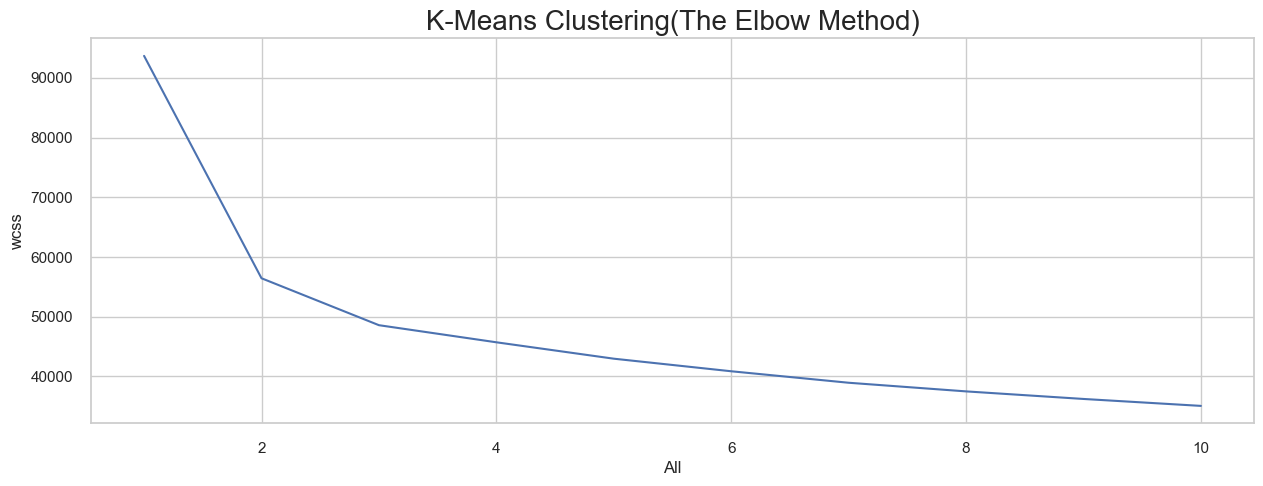

In [127]:
from sklearn.cluster import KMeans
wcss = []
x = df.iloc[:,1:28]#.values

sc = StandardScaler()
x = sc.fit_transform(x)

#x = df[['Pasto Economico','Cappuccino','Cola','Acqua','Riso',"Latte","Formaggio Locale",'Vino',"Birra Locale","Pane","Pollo",'Pomodori',"Manzo"]].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

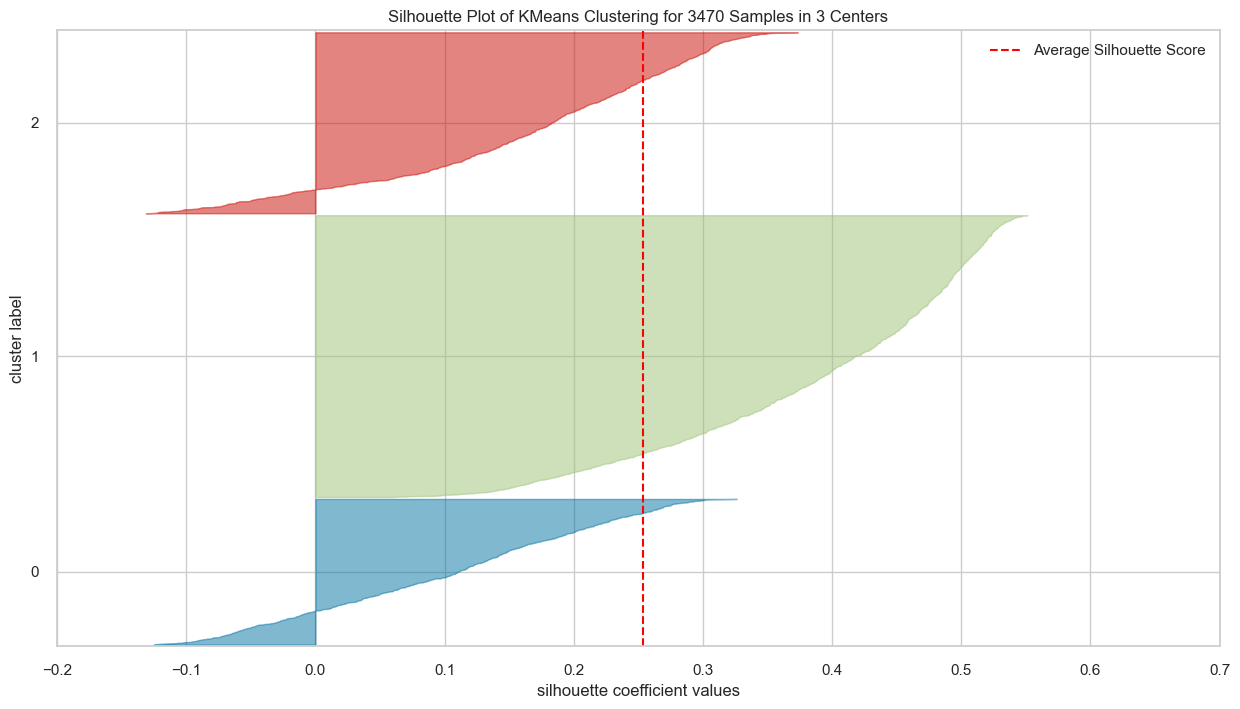

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3470 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [128]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()  

# PCA senza normalizzazione

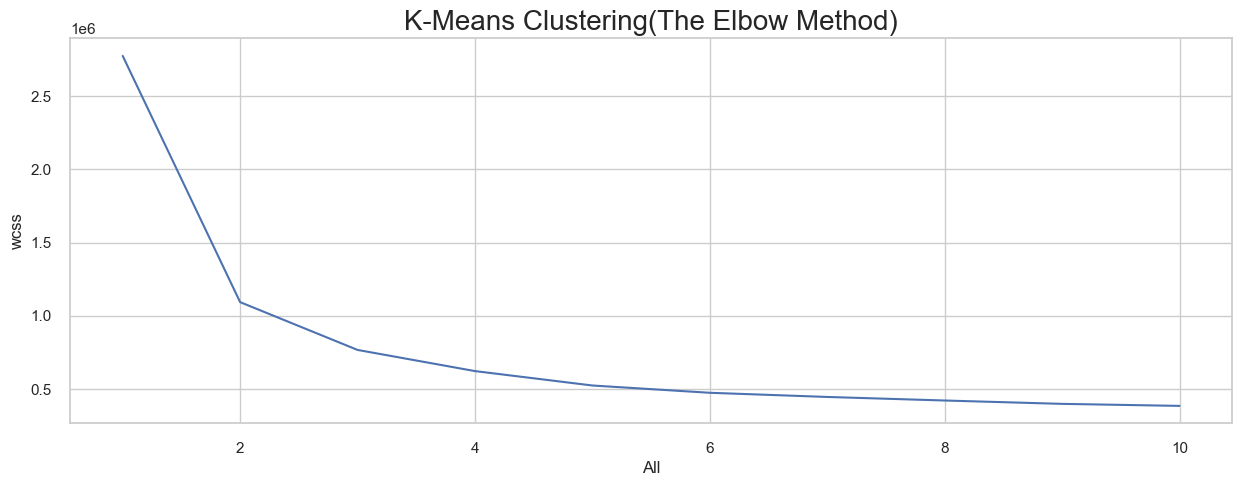

In [130]:
from sklearn.cluster import KMeans
wcss = []
x = df.iloc[:,1:28].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

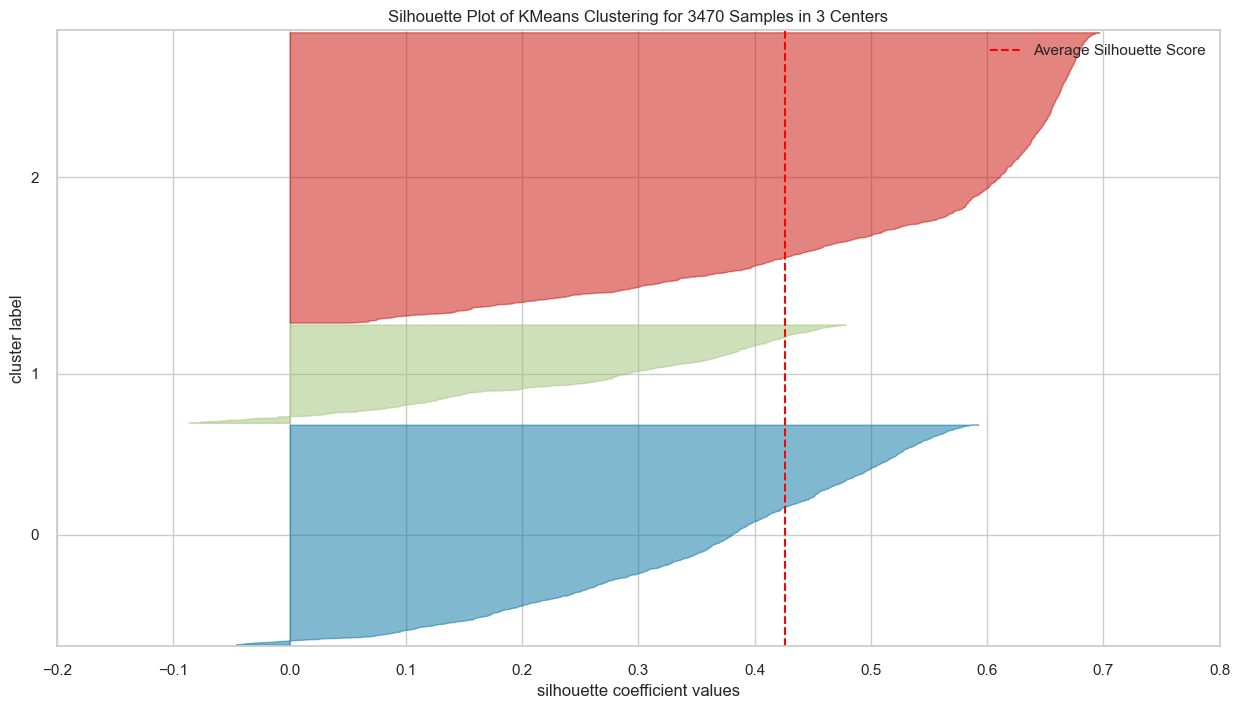

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3470 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [131]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()  

In [133]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)

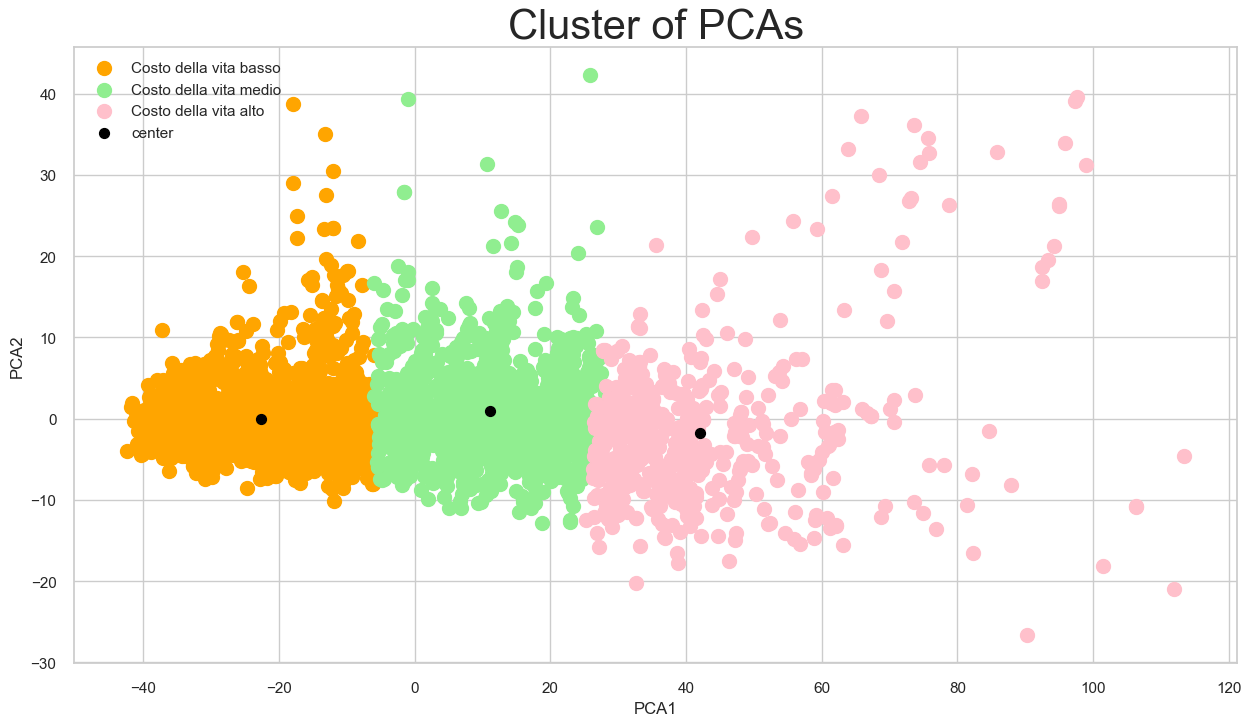

In [134]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Costo della vita basso')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Costo della vita medio')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Costo della vita alto')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

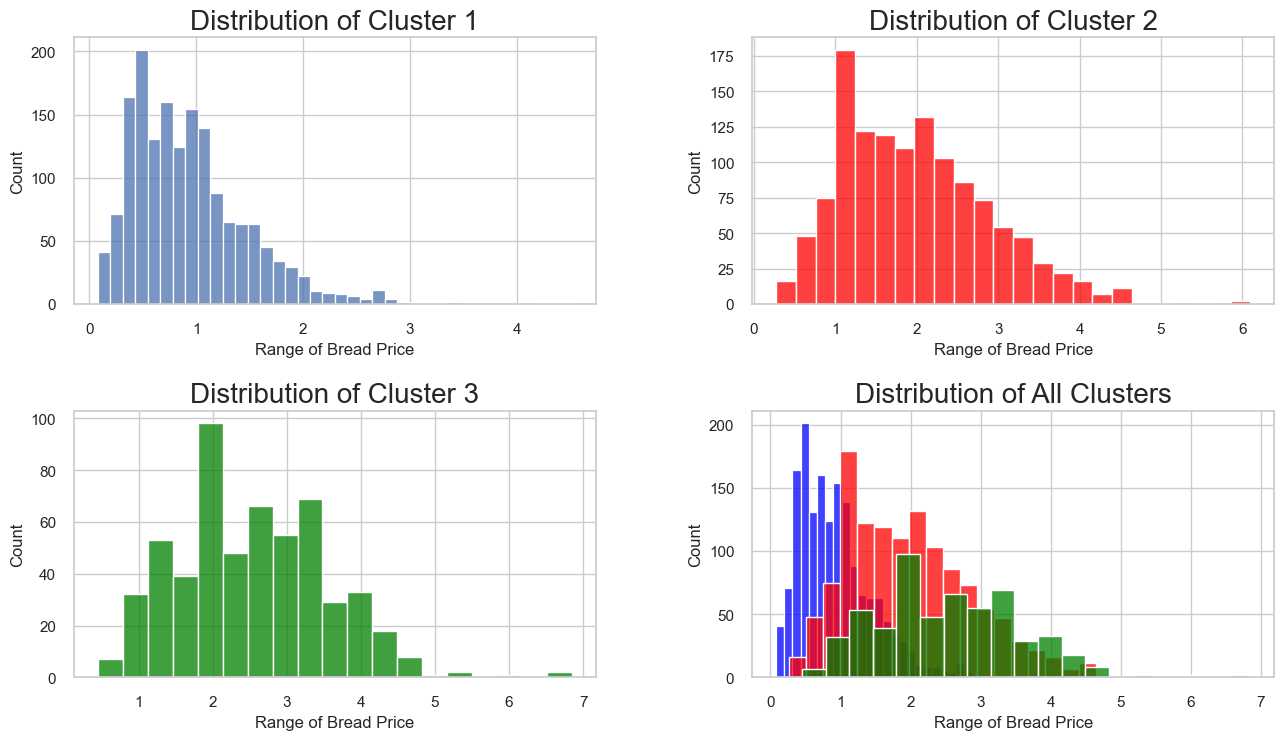

In [136]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pane'], kde=False)
plt.title('Distribution of Cluster 1', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(cluster2['Pane'], color = 'red', kde=False)
plt.title('Distribution of Cluster 2', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(cluster3['Pane'], color = 'green', kde=False)
plt.title('Distribution of Cluster 3', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(cluster1['Pane'],color='blue',kde=False)
sns.histplot(cluster2['Pane'],color='red',kde=False)
sns.histplot(cluster3['Pane'],color='green',kde=False)
plt.title('Distribution of All Clusters', fontsize = 20)
plt.xlabel('Range of Bread Price')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.4)
plt.show()


# Fine PCA - DBSCAN non ha portato risultati soddisfacenti

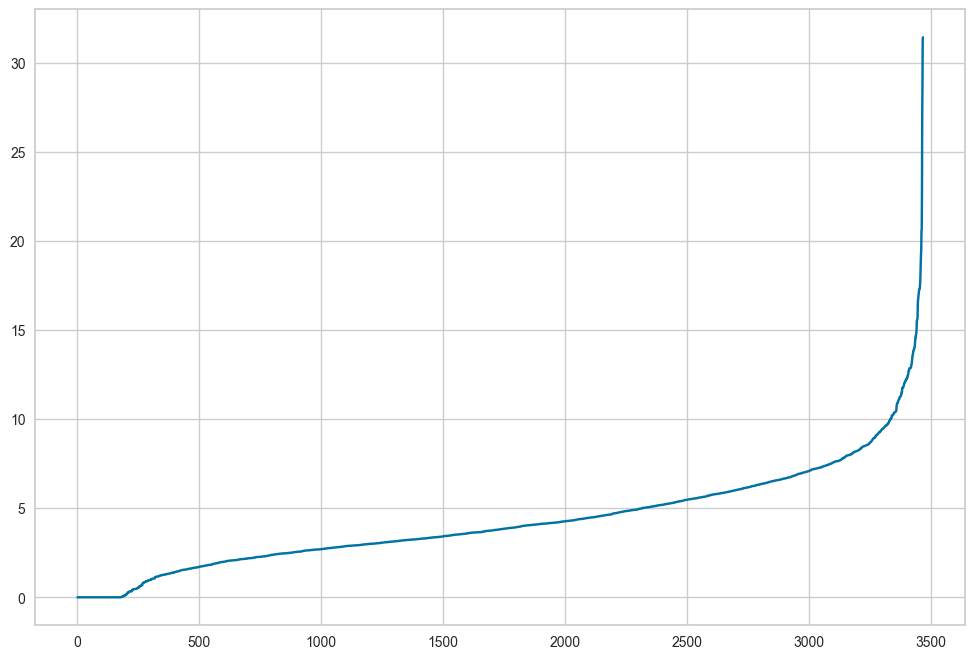

In [33]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [41]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.02, min_samples=56).fit(x)
ymeans = db.labels_
ymeans

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


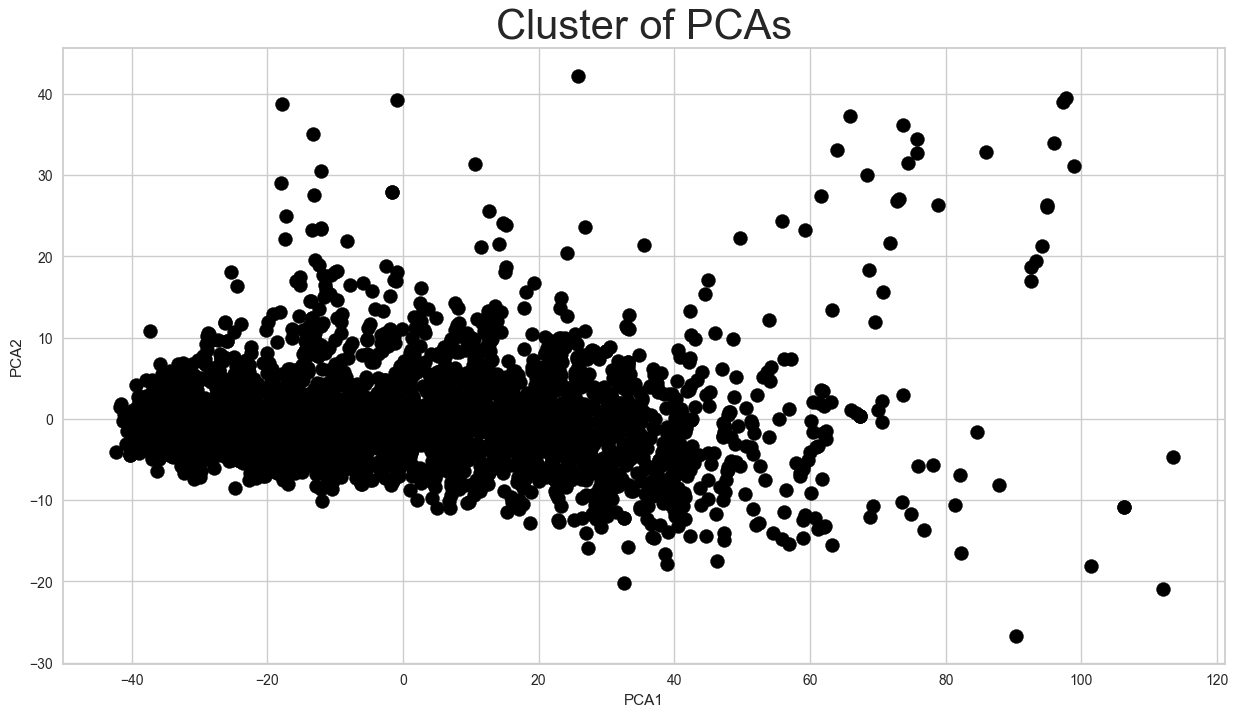

In [42]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [35]:
x

array([[ 4.9 , 22.04,  4.28, ...,  1.53,  2.51,  4.28],
       [ 5.59, 40.51,  5.59, ...,  0.91,  1.93,  3.49],
       [ 2.54, 22.25,  3.5 , ...,  2.06,  3.18,  2.22],
       ...,
       [15.76, 66.39, 10.06, ...,  4.06,  3.38, 30.18],
       [13.41, 63.71,  8.05, ...,  3.46,  3.52, 25.48],
       [17.3 , 70.61,  8.47, ...,  4.24,  3.53,  9.89]])

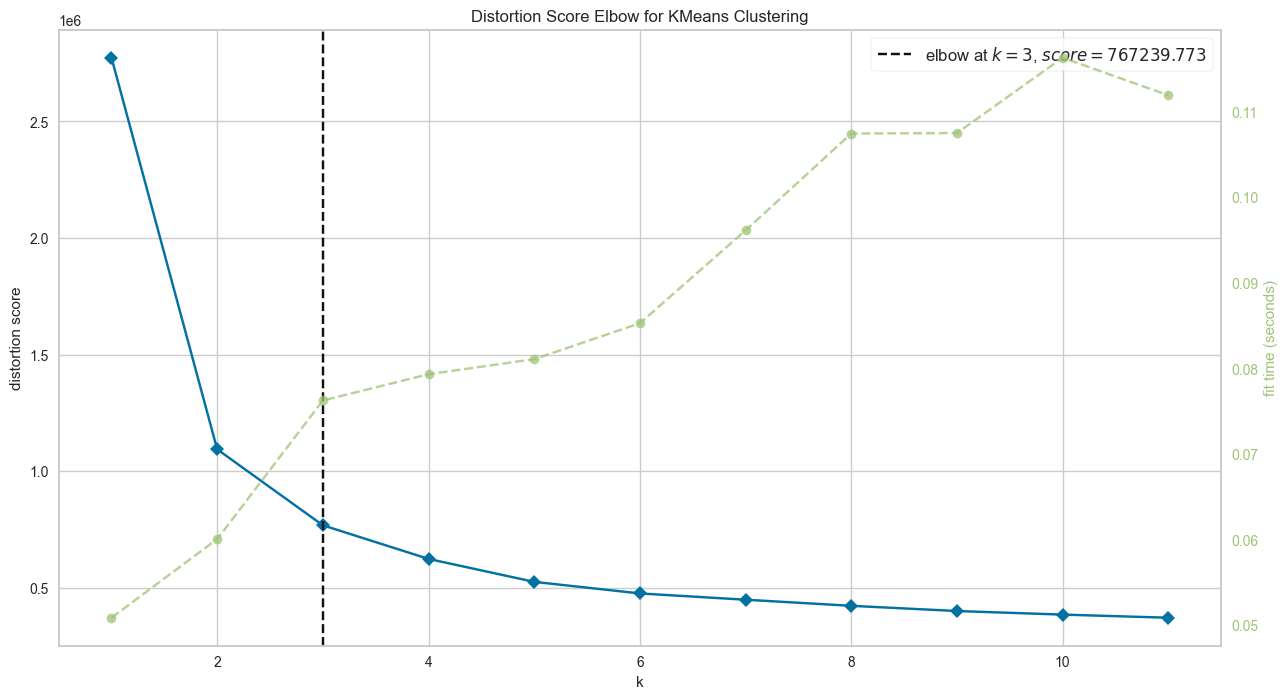

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Final

#Test

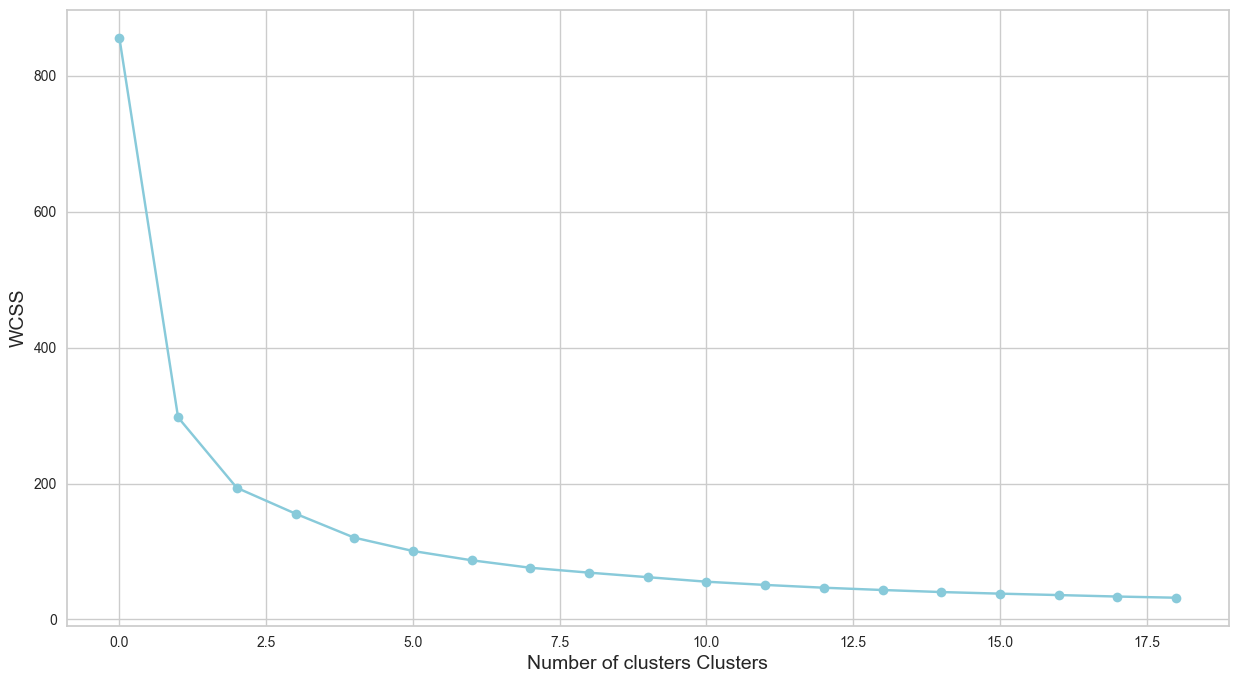

In [47]:
plt.figure(figsize=(15,8)) 
plt.plot(wcss, 'bo-', color='c')
plt.xlabel('Number of clusters Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14);

In [48]:
kmeans =  KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(dfc)

KMeans(algorithm='auto', max_iter=600, n_clusters=3)

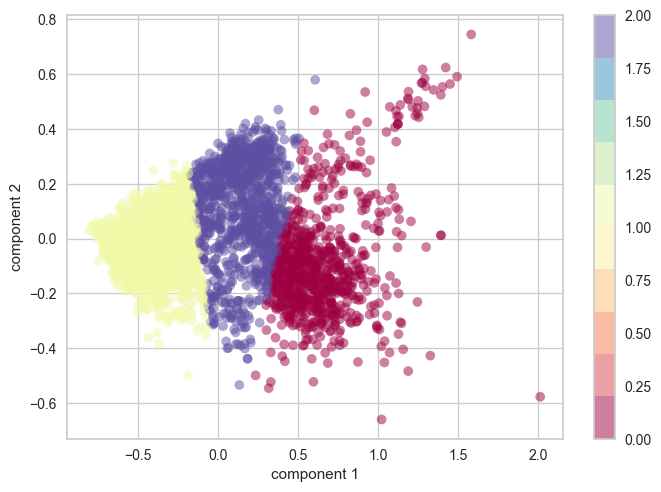

In [49]:
plt.scatter(dfc[:, 0], dfc[:, 1],
            c= kmeans.labels_.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [50]:
dfn["cluster"] = kmeans.labels_.astype(float)

In [51]:
pca = PCA(n_components=2)
pca.fit(dfn)
dfd = pca.transform(dfn)

In [56]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=20).fit(dfd)
labels = db.labels_

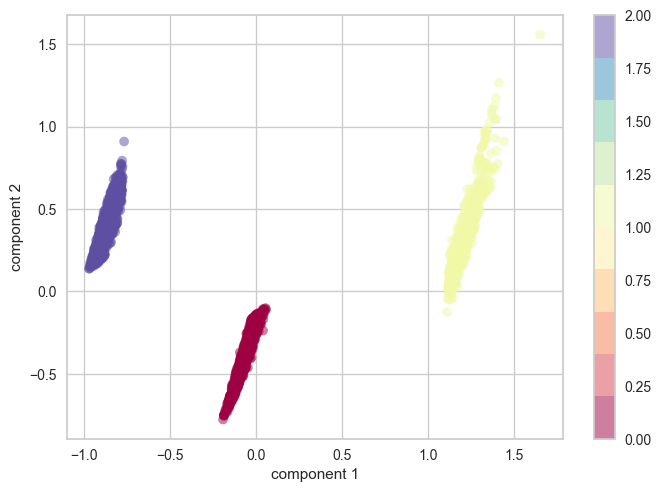

In [57]:
plt.scatter(dfd[:, 0], dfd[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [58]:
dfn["clusterDBSCAN"] = labels.astype(float)

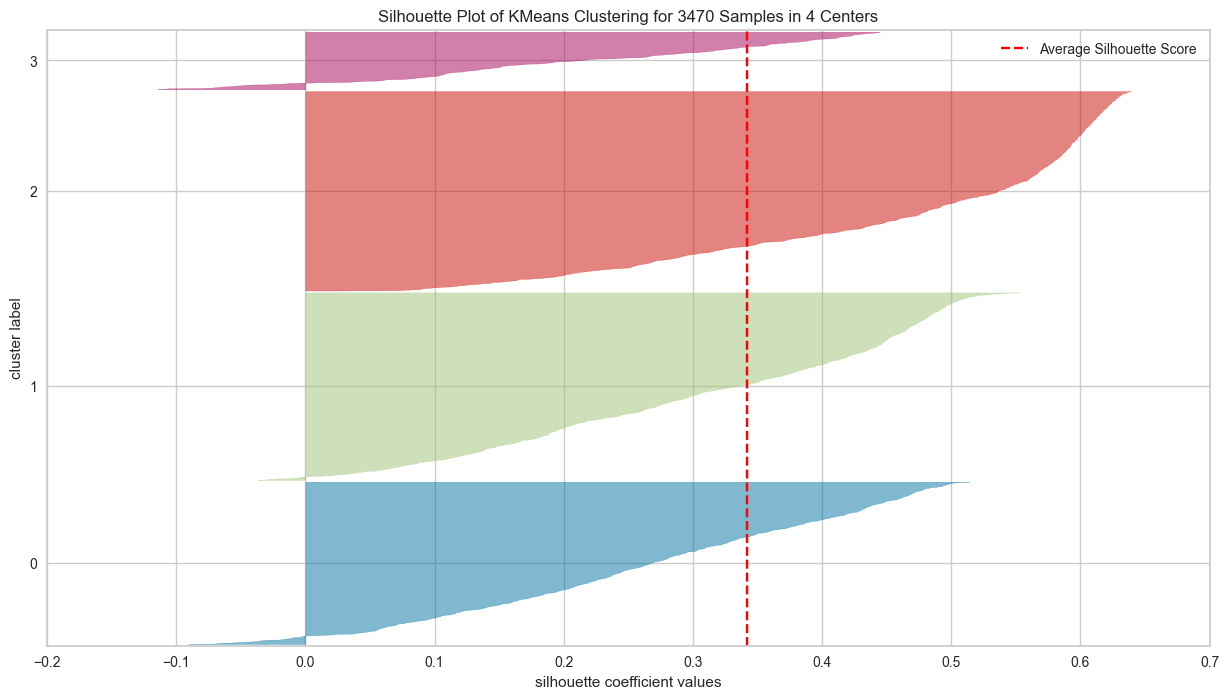

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3470 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()  

# Classificazione

In [14]:
#classdata = df[["Latte","Formaggio Locale","Birra Locale","Pollo","Manzo","Acqua","Vino"]]
# to_drop = ['Unnamed: 0','x28','x29','x30','x31','x32','x34','x35','x37','x39','x40',
#            'x42','x43','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','data_quality']
# df.drop(to_drop, axis=1, inplace=True)
classdata = df.copy(deep=True)
classdata.drop(["country","Pane"],axis=1,inplace=True)


In [31]:
# # Data Normalization
# names = classdata.columns
# scaler = MinMaxScaler()
# scaled_d = scaler.fit_transform(classdata)
# classdata[["Latte","Formaggio Locale","Birra Locale","Pane","Pollo","Manzo","Acqua","Vino"]] = scaled_d
# classdata.head()

In [13]:
# pane = df['Pane']
# classdata['Pane'] = pd.Series(pane)

# Class balance
# economico = classdata[classdata.Pane <= 1.3]
# no_economico = classdata[classdata.Pane > 1.3]
# print("economico: ", len(economico), " NOT economico: ", len(no_economico))
# economico
conditionlist = [ (df['Pane'] <= 1.3), (df['Pane'] > 1.3)] 
choicelist = [0,1] 
classdata['Pane'] = np.select(conditionlist, choicelist)
classdata.head()

Pasto Economico  Pasto per 2  Pasto McDonald  Birra Locale  \
city                                                                   
Delhi                4.90        22.04            4.28          1.84   
Shanghai             5.59        40.51            5.59          1.12   
Jakarta              2.54        22.25            3.50          2.02   
Manila               3.54        27.40            3.54          1.24   
Seoul                7.16        52.77            6.03          3.02   

          Birra Estera  Cappuccino  Cola  Acqua  Latte  Riso  ...   Vino  \
city                                                          ...          
Delhi             3.67        1.78  0.48   0.19   0.73  0.88  ...   9.79   
Shanghai          4.19        3.96  0.52   0.32   2.68  1.18  ...  13.97   
Jakarta           3.18        2.19  0.59   0.27   1.28  0.83  ...  20.66   
Manila            1.90        2.91  0.93   0.51   1.63  0.89  ...   8.84   
Seoul             4.52        3.86  1.46   0.78   2.13  3.66  ...  15.08   

          Birra Locale (Supermarket)  Birra Estera (Supermarket)  Sigarette  \
city                                                                          
Delhi                           1.53                        2.51       4.28   
Shanghai                        0.91                        1.93       3.49   
Jakarta                         2.06                        3.18       2.22   
Manila                          1.15                        1.55       2.65   
Seoul                           2.10                        2.49       3.39   

          Carburante  Utenze Domestiche (85 mq)  Internet  Cinema  Jeans  Pane  
city                                                                            
Delhi           1.25                      57.37      7.96    4.90  32.05     0  
Shanghai        1.17                      64.76     16.74    8.38  69.17     1  
Jakarta         0.79                      80.12     30.45    3.18  38.87     0  
Manila          1.38                      97.45     38.02    5.48  38.45     0  
Seoul           1.41                     176.24     22.06    9.42  56.99     1  

[5 rows x 32 columns]

In [33]:
#balanced_d = pd.concat([economico, no_economico.sample(len(economico))])
x = classdata.iloc[:,:-1]
y = classdata.iloc[:,-1:]


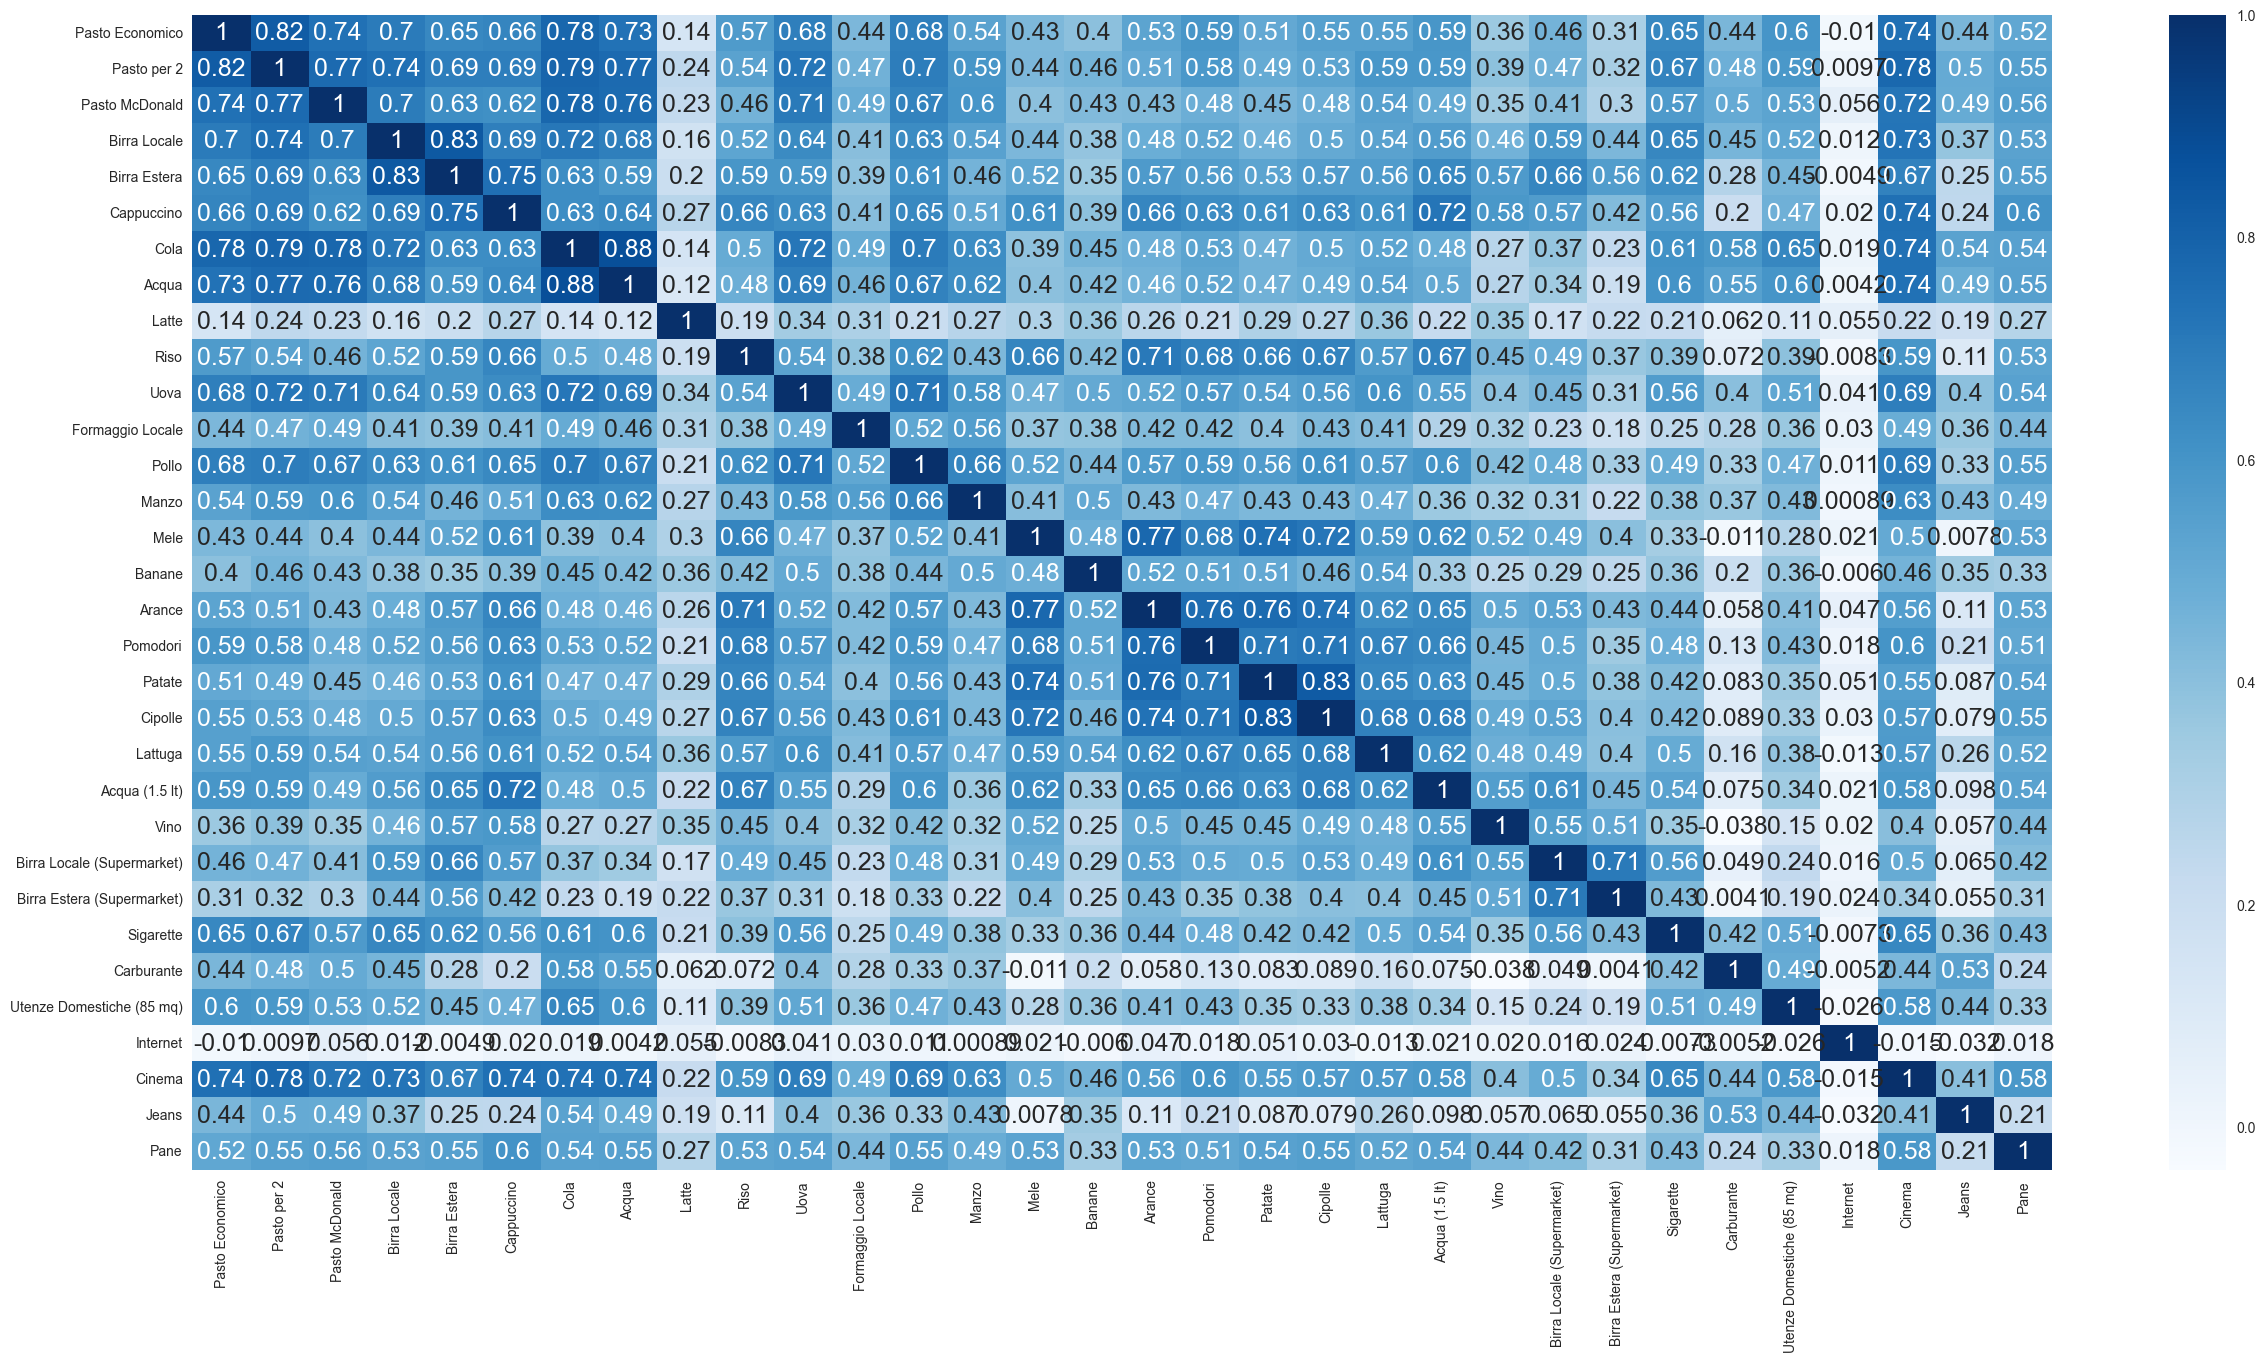

In [34]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(30,15))
ax = sns.heatmap(classdata[classdata.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

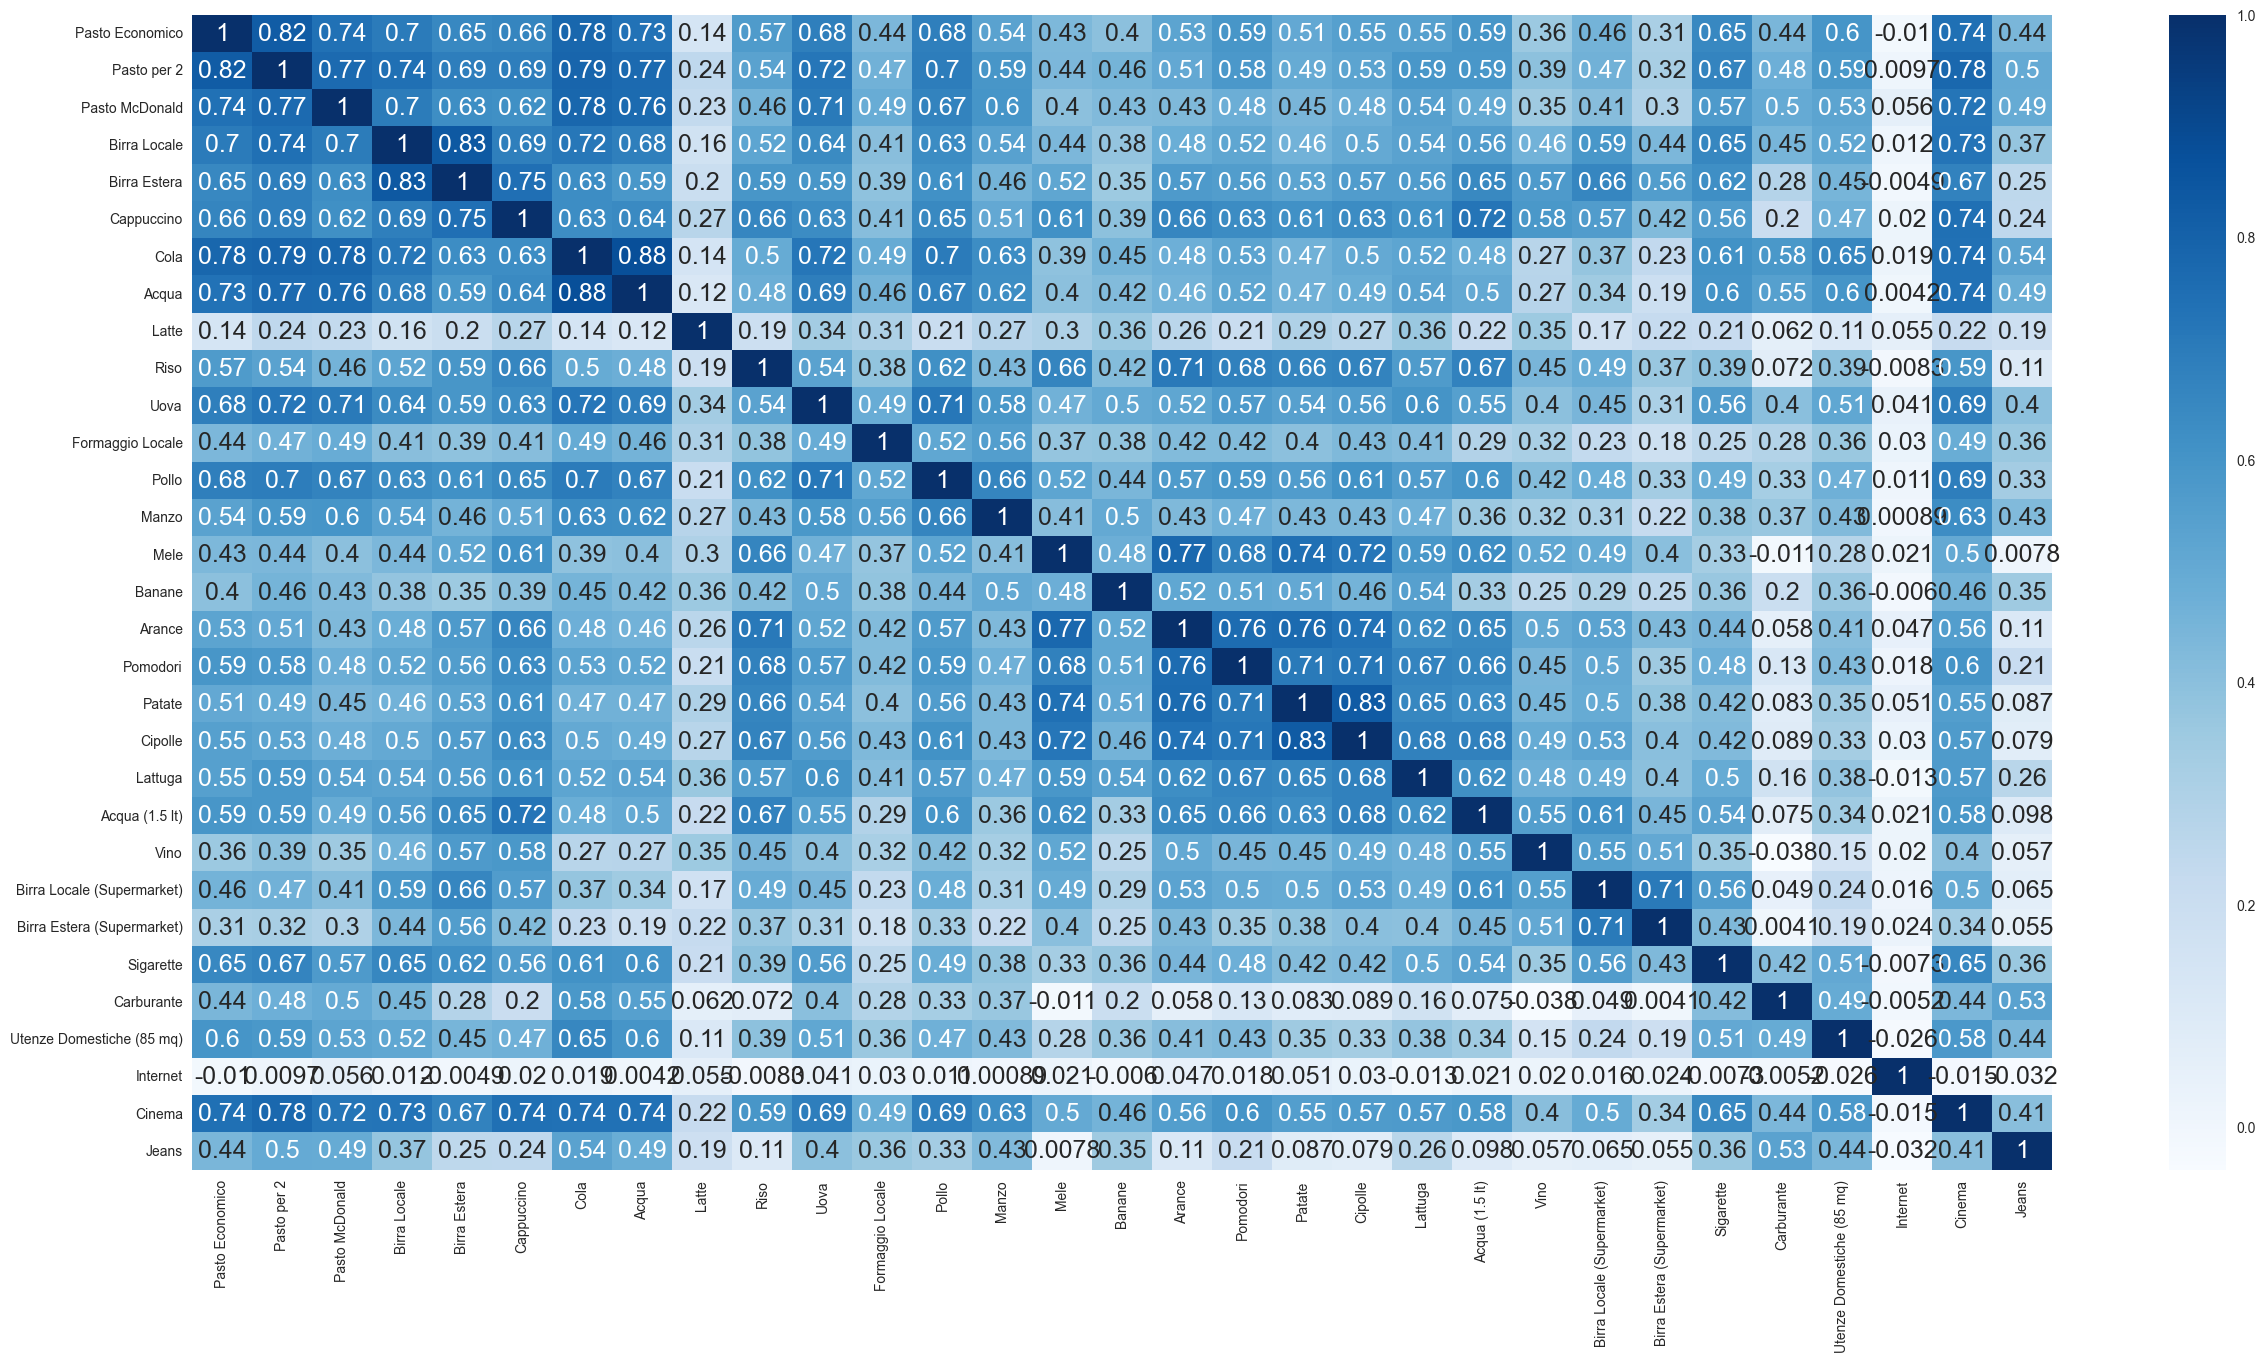

In [35]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [36]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train.astype(int)
y_test.astype(int)
# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2776, 31)
(694, 31)
(2776, 1)
(694, 1)


In [37]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [39]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.84 	 ---> LogisticRegression 
Accuracy: 0.85 	 ---> DecisionTreeClassifier 
Accuracy: 0.82 	 ---> SVC 
Accuracy: 0.89 	 ---> RandomForestClassifier 


Text(0.5, 1.0, 'Cross validation scores')

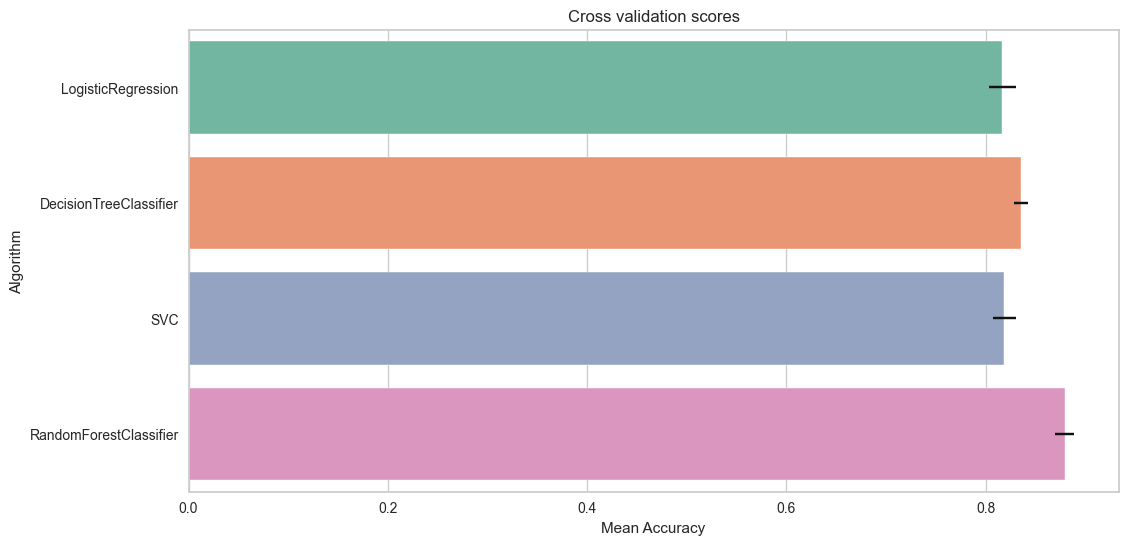

In [47]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(data = cv_res, x="CrossValMeans", y="Algorithm", palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

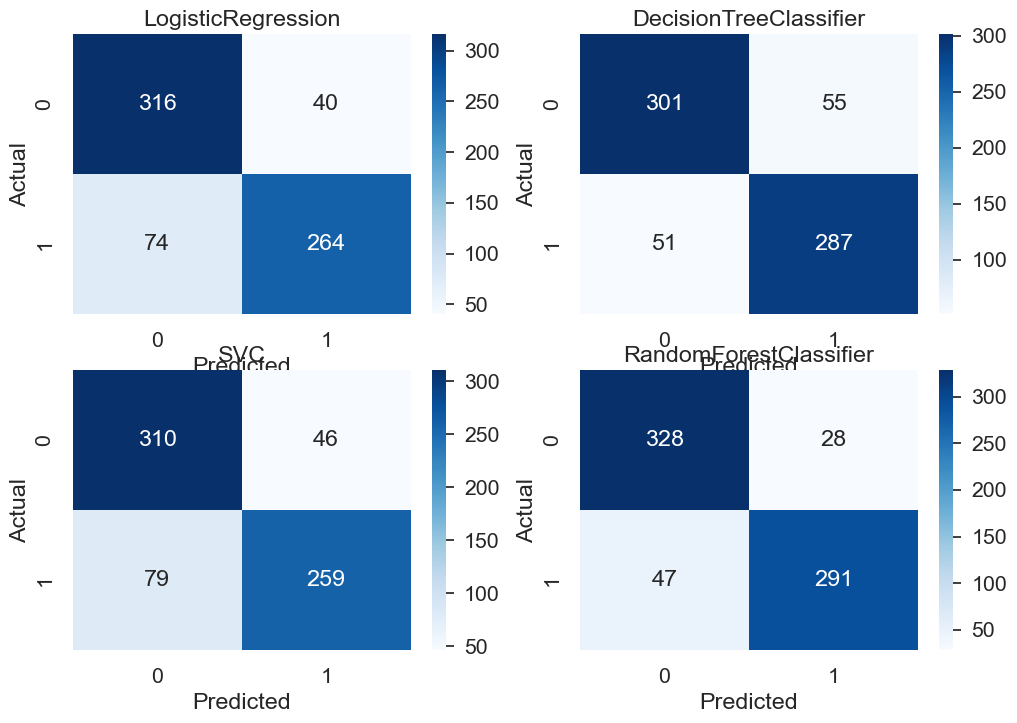

In [48]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(2,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [49]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       356
           1       0.87      0.78      0.82       338

    accuracy                           0.84       694
   macro avg       0.84      0.83      0.83       694
weighted avg       0.84      0.84      0.84       694

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       356
           1       0.84      0.85      0.84       338

    accuracy                           0.85       694
   macro avg       0.85      0.85      0.85       694
weighted avg       0.85      0.85      0.85       694

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       356
           1       0.85      0.77      0.81       338

    accuracy                           0.82       694
   macro avg 

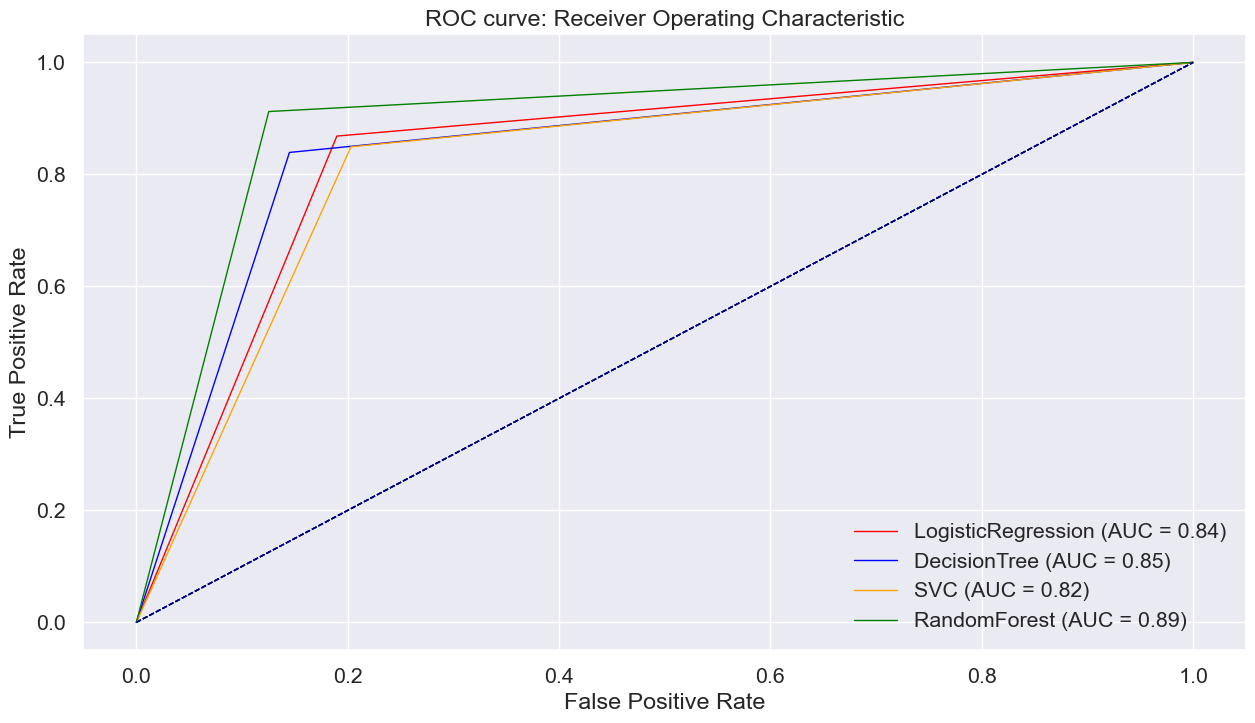

In [50]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [51]:
# Search grid for optimal parameters

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [52]:
# # scores without gridsearch
# print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# # scores with gridsearch
# print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

score without GridSearchCV:  0.836 0.879
score with GridSearchCV:  0.856 0.903


Text(0.5, 1.0, 'Correlation between models')

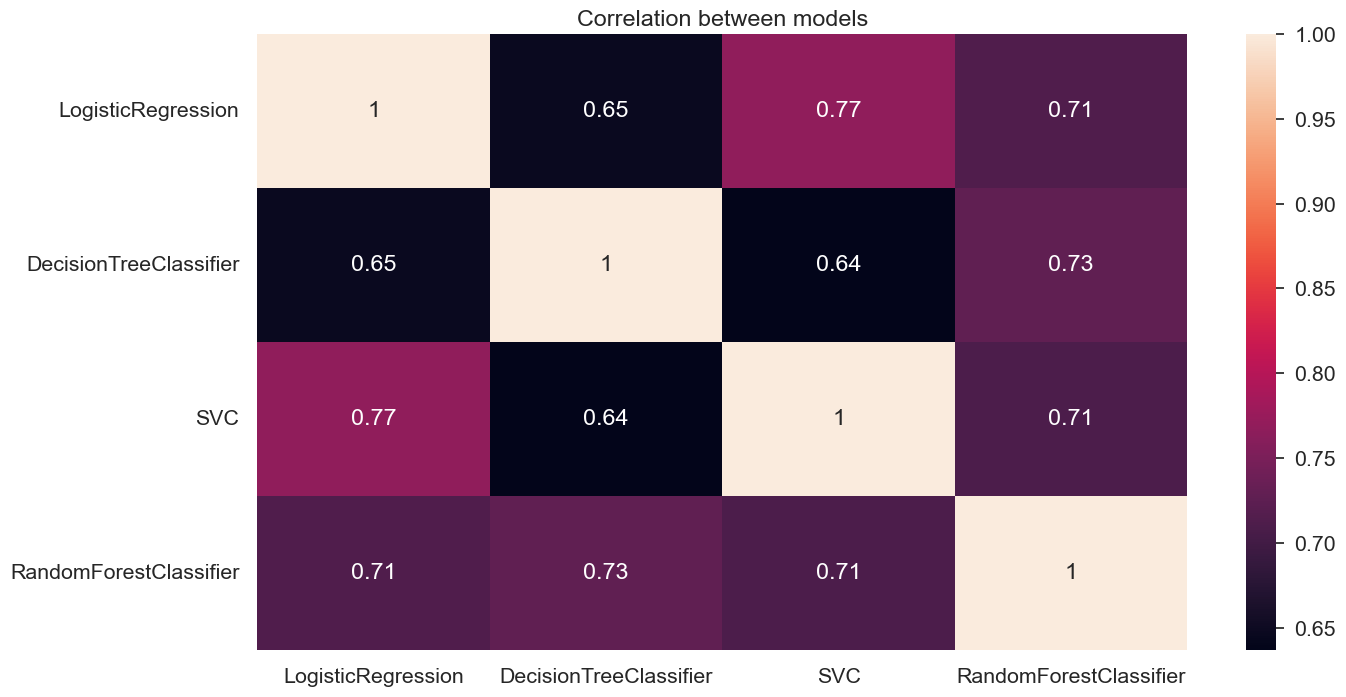

In [53]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("Pane", axis=1).corr(),annot=True)
plt.title("Correlation between models")

In [54]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train)
print(accuracy_score(y_test,best_model.predict(x_test)))

0.8861671469740634
